# Lending Club Case Study

The current exercise is part of **UpGrad's** "Introduction into Statistics" course assignment. The goal of the exercise is to help the Lender to make better credit decisions (*rejection* or *approval* of the credit application) by identifying factors that can serve as singals for potential future credit defaults.
The toolset of this analysis is limited to *Exploratory Data Analysis* and doesn't cover more complex tools such as modeling or ML activities. 

## I. Preparation 

In [1]:
# Importing the libraries used in this excercise

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

# Setting the plot font sizes
sns.set(font_scale=1.3)

### Dataset

The current analysis is based on two files:
* 'loan.csv' - historycal portfolio data containing records of approved credit contracts (both defaulted and non defaulted). Data about rejected loan applications is not available. 
* 'Data_Dictionary.xlsx' - dictionary describing the business content of the attributes within the loan.csv

In [2]:
#reading the data into a Pandas Data Frame called 'df'

df = pd.read_csv('loan.csv', low_memory=False)

In [3]:
# Understanding the dimensions and types of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [4]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [5]:
# Understanding if every row indeed represents a unique case
df.id.value_counts().count() == df.shape[0] #Checking if the number of unique IDs equals to the number of rows of the data frame 

True

#### Observations:
- 39717 records
- 111 columns

Every row represents one credit record

## II. Data Cleaning

### II. / 1. Handling missing values

In [6]:
df.isnull().sum().sort_values()

id                                0
earliest_cr_line                  0
inq_last_6mths                    0
open_acc                          0
pub_rec                           0
                              ...  
avg_cur_bal                   39717
bc_open_to_buy                39717
bc_util                       39717
mo_sin_old_rev_tl_op          39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [7]:
df.isnull().sum().value_counts().sort_index(ascending=False)

39717    54
38577     1
36931     1
25682     1
12940     1
2459      1
1075      1
697       1
71        1
56        2
50        1
39        1
11        1
2         1
0        43
dtype: int64

#### Observations:
Only 43 columns have no missing data.
Almost half of the columns (54) are entirely empty. And 4 additional columns have more than 10000 missing values. 

In [8]:
# Listing all columns with missing values more than 10000
print(df.isnull().sum()[df.isnull().sum()>10000].sort_values())

desc                              12940
mths_since_last_delinq            25682
mths_since_last_record            36931
next_pymnt_d                      38577
mo_sin_rcnt_tl                    39717
mort_acc                          39717
mths_since_recent_bc              39717
mths_since_recent_bc_dlq          39717
mths_since_recent_inq             39717
mths_since_recent_revol_delinq    39717
num_accts_ever_120_pd             39717
num_actv_bc_tl                    39717
num_actv_rev_tl                   39717
num_bc_sats                       39717
num_bc_tl                         39717
num_il_tl                         39717
num_rev_accts                     39717
mo_sin_rcnt_rev_tl_op             39717
num_rev_tl_bal_gt_0               39717
num_sats                          39717
num_tl_120dpd_2m                  39717
num_tl_30dpd                      39717
num_tl_90g_dpd_24m                39717
num_tl_op_past_12m                39717
pct_tl_nvr_dlq                    39717


In [9]:
# Checking the content of 'desc' column if it contains someting important
df.desc.head(30)

0       Borrower added on 12/22/11 > I need to upgra...
1       Borrower added on 12/22/11 > I plan to use t...
2                                                   NaN
3       Borrower added on 12/21/11 > to pay for prop...
4       Borrower added on 12/21/11 > I plan on combi...
5                                                   NaN
6       Borrower added on 12/18/11 > I am planning o...
7       Borrower added on 12/16/11 > Downpayment for...
8       Borrower added on 12/21/11 > I own a small h...
9       Borrower added on 12/16/11 > I'm trying to b...
10      Borrower added on 12/15/11 > I had recived a...
11                                                  NaN
12      Borrower added on 12/15/11 > Plan to pay off...
13      Borrower added on 12/19/11 > I intend to pay...
14                                                  NaN
15                                                  NaN
16                                                  NaN
17      Borrower added on 12/15/11 > Payoff othe

#### Observations:
Description is mainly about the loan purpose. It is reflected in other columns as well so it can be deleted. 

In [10]:
# Creating 'columns to delete' (columns with missing values more than 10000)
cols_to_delete=df.isnull().sum()[df.isnull().sum()>10000].index

In [11]:
# Deleting the columns that have more than 10000 missing values
df=df.drop(columns=cols_to_delete)

In [12]:
df.shape

(39717, 53)

In [13]:
# Crosscheck, making sure that the sum of deleted and the kept columns quals to the original number of cols (111)
len(cols_to_delete)+len(df.columns)==111

True

In [14]:
df.isnull().sum()

id                               0
member_id                        0
loan_amnt                        0
funded_amnt                      0
funded_amnt_inv                  0
term                             0
int_rate                         0
installment                      0
grade                            0
sub_grade                        0
emp_title                     2459
emp_length                    1075
home_ownership                   0
annual_inc                       0
verification_status              0
issue_d                          0
loan_status                      0
pymnt_plan                       0
url                              0
purpose                          0
title                           11
zip_code                         0
addr_state                       0
dti                              0
delinq_2yrs                      0
earliest_cr_line                 0
inq_last_6mths                   0
open_acc                         0
pub_rec             

In [15]:
df.emp_length.value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [16]:
df.emp_length = df.emp_length.fillna(df.emp_length.mode()[0])

In [17]:
df.emp_length.value_counts()

10+ years    9954
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

#### Result of missing value handling:
- 56 columns have been deleted
- 1 row was filled with the 'modus' value
- There are still missing values but the handling of those missing values will be handled later when analysing the content of those columns

### II. / 2. Checking the 'entropy'

If one column contains the same unique value for every single record throughout the entire dataset, it doesn't contain information for us. Likewise if a column contains as many unique values as there are records (and it is unorderable discreet variable) it might be useless for us as well.

In [18]:
# checking the number of unique values in each column to find extremes (1 or 38717)
df.apply(lambda x : len(x.value_counts())).sort_values()

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
collections_12_mths_ex_med        1
initial_list_status               1
pymnt_plan                        1
term                              2
pub_rec_bankruptcies              3
verification_status               3
loan_status                       3
pub_rec                           5
home_ownership                    5
grade                             7
inq_last_6mths                    9
delinq_2yrs                      11
emp_length                       11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
last_pymnt_d                    101
last_credit_pull_d              106
int_rate                    

In [19]:
# Preparing for deletion those columns where we have 1 unique value or where the number of unique values equals
# to the lenght of the dataframe
temp = df.apply(lambda x : len(x.value_counts()))
to_delete = temp[(temp==1) | (temp==len(df))].index.to_list() #creating the column name list for deletion

In [20]:
to_delete

['id',
 'member_id',
 'pymnt_plan',
 'url',
 'initial_list_status',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'tax_liens']

In [21]:
# Making sure that we don't delete something important
for i in to_delete:
    print(df[i].value_counts())

1077501    1
568534     1
568659     1
567165     1
568531     1
          ..
785667     1
785659     1
785630     1
785626     1
87023      1
Name: id, Length: 39717, dtype: int64
1296599    1
731393     1
731544     1
729629     1
731390     1
          ..
989001     1
988993     1
988959     1
988954     1
86999      1
Name: member_id, Length: 39717, dtype: int64
n    39717
Name: pymnt_plan, dtype: int64
https://lendingclub.com/browse/loanDetail.action?loan_id=1077501    1
https://lendingclub.com/browse/loanDetail.action?loan_id=568534     1
https://lendingclub.com/browse/loanDetail.action?loan_id=568659     1
https://lendingclub.com/browse/loanDetail.action?loan_id=567165     1
https://lendingclub.com/browse/loanDetail.action?loan_id=568531     1
                                                                   ..
https://lendingclub.com/browse/loanDetail.action?loan_id=785667     1
https://lendingclub.com/browse/loanDetail.action?loan_id=785659     1
https://lendingclub.com/brows

#### Observations:
- **id** and **member id** are indeed id columns, and can be deleted
- **url** is unique for every single record (contains the loan id at the end so it is kind of 'id' as well)
- The rest of the columns contain 1 value over the entire dataset

These columns can be deleted!

In [22]:
# emp_title is a categorycal column with lots of unique values. Lets check it:
df.emp_title.value_counts()

US Army                              134
Bank of America                      109
IBM                                   66
AT&T                                  59
Kaiser Permanente                     56
                                    ... 
Community College of Philadelphia      1
AMEC                                   1
lee county sheriff                     1
Bacon County Board of Education        1
Evergreen Center                       1
Name: emp_title, Length: 28820, dtype: int64

#### Observation:
There are too few values in each category to infer anything so this column shall be deleted as well.

In [23]:
#adding this column to the list of columns to be deleted
to_delete.append('emp_title')

In [24]:
# Deleting the columns with low entropy
df = df.drop(columns=to_delete)

In [25]:
df.isnull().sum()

loan_amnt                    0
funded_amnt                  0
funded_amnt_inv              0
term                         0
int_rate                     0
installment                  0
grade                        0
sub_grade                    0
emp_length                   0
home_ownership               0
annual_inc                   0
verification_status          0
issue_d                      0
loan_status                  0
purpose                      0
title                       11
zip_code                     0
addr_state                   0
dti                          0
delinq_2yrs                  0
earliest_cr_line             0
inq_last_6mths               0
open_acc                     0
pub_rec                      0
revol_bal                    0
revol_util                  50
total_acc                    0
out_prncp                    0
out_prncp_inv                0
total_pymnt                  0
total_pymnt_inv              0
total_rec_prncp              0
total_re

In [26]:
# Number of deleted columns
111-len(df.columns)

71

In [27]:
df[df.isnull().sum(axis=1)>1]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
13891,2000,2000,1900.0,36 months,18.39%,72.70,E,E2,1 year,RENT,...,89.79,0.0,0.00,0.0,89.79,0.85,NaN,0.0,Nov-11,0.0
28685,7000,7000,6975.0,60 months,18.67%,180.32,F,F2,4 years,RENT,...,1971.82,0.0,0.00,0.0,1978.88,692.59,NaN,0.0,May-16,0.0
36209,2000,2000,2000.0,36 months,16.00%,70.32,E,E2,< 1 year,RENT,...,89.99,0.0,0.00,0.0,89.99,0.90,NaN,0.0,Dec-09,0.0
37911,5000,5000,4250.0,36 months,18.21%,181.30,F,F4,1 year,MORTGAGE,...,191.03,0.0,0.00,0.0,224.77,2.22,NaN,0.0,Sep-09,0.0
39476,1000,1000,875.0,36 months,7.12%,30.94,A,A1,< 1 year,MORTGAGE,...,971.96,1000.0,110.81,0.0,0.00,0.00,Aug-10,185.8,NaN,NaN


### II. / 3. Checking the records with missing values

So far we have focused on columns. Now it's time to check if there are records with missing values to be deleted. 

In [28]:
# Checking the number of missing values per records
df.isnull().sum(axis=1).value_counts()

0    38891
1      821
2        5
dtype: int64

#### Observations:
There are only 5 rows with 2 missing values, there are 821 rows with one missing value. No treatment on row level is needed

#### Final remarks:
- We have deleted 71 out of the original 111 columns during data cleansing
- The remaining 40 columns still contain missing values and the content still has to be checked but it will be handled later on, when checking them one by one. 

## III. Business understanding
The goal of this part is to understand the business content and to make decisions / cleanings / transformation based on the acquired information

In [29]:
df['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

#### Reading the Data Dictionary file

In [30]:
df_dict = pd.read_csv('Data_Dictionary_z.csv',delimiter=';')

In [31]:
df_dict.head()

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...


#### Categorizing the values

Checking the values we can see that we have 3 major categories:
- Demographic: Information that describes the borrower and that might be available for a 'new to bank' customer. This is the information that can be used for answering the original question of the task
- Behavior data: Information about the financial behavior of the customer. This kind of information can be used as predictor of a future default however behavior information is available only after the customer has been approved and granted a loan. Therefore it can't be used for prediction however it can be used as an early signal for existing customers. Information that represents the "Bank's" decision in some form is also present here. 
- Post-Default information. Information that is available for defaulted customers only. This information leaks the future and therefore it has to be excluded.

The categorization is subjective in some cases and reflexts expertal judgement

In [32]:
# Manual Categorization of the information
Demographic_cols = ['addr_state', 'annual_inc', 'dti', 'earliest_cr_line',
                    'emp_length', 'home_ownership', 'loan_amnt', 'pub_rec', 'pub_rec_bankruptcies',
                   'purpose', 'term', 'title', 'total_acc', 'verification_status', 'zip_code', 'open_acc']
Behavioral_cols = ['delinq_2yrs', 'funded_amnt', 'funded_amnt_inv', 'grade', 'inq_last_6mths', 'installment',
                  'int_rate', 'issue_d', 'last_credit_pull_d', 'last_pymnt_amnt', 'last_pymnt_d', 'out_prncp',
                  'out_prncp_inv', 'revol_bal', 'revol_util', 'sub_grade', 'total_pymnt', 'total_pymnt_inv',
                   'total_rec_int', 'total_rec_prncp']
Leaking_cols = ['collection_recovery_fee', 'recoveries', 'total_rec_late_fee']

#Target value, the column, which value is to be 'predicted' or explainded in our case
Target = 'loan_status'

In [33]:
#Cross check if all the columns were taken into account
len(Demographic_cols) + len(Behavioral_cols) + len(Leaking_cols) + 1 == len(df.columns.tolist()) # +1 is added for the target column

True

#### Removing the Leaking columns
As these columns can't help us in predicting potential default cases

In [34]:
# Removing the Leaking columns
df=df.drop(columns=Leaking_cols)

#### Creating Target column

In [35]:
df[Target].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

'Current' value means the accounts are still active meaning we have no information whether they will be defaulted or Fully Paid. Hence shall be deleted

In [36]:
# Deleting the 'Current' rows
df=df[~(df[Target]=='Current')]
df[Target].value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

In [37]:
# Creating a 'Defaulted' column:
df['Defaulted'] = df[Target].apply(lambda x : True if x=='Charged Off' else False)
df.Defaulted.value_counts()

False    32950
True      5627
Name: Defaulted, dtype: int64

In [38]:
# Removing original Target column
df = df.drop(columns=Target)

#### Final remarks
As part of the Business Understanding part we **narrowed down the further analysis to columns that contain information available before credit decision**. It is important as our final goal is to indentify factors that can predict future problems by the time of the credit decision
We deleted the leaking columns but kept the 'Behavior' column as it might serve a basis for further analysis in the future
We also created a 'Defaulted' column containing the target variable as a boolean.

## IV. Analysis

### Overview of the activity

##### Portfolio size and dynamics

In [39]:
df.issue_d = pd.to_datetime(df.issue_d, format=('%b-%y'))
df['issue_year'] = pd.DatetimeIndex(df.issue_d).year

issue_year
2007      2152175
2008     13457075
2009     46324425
2010    116635400
2011    237447550
Name: funded_amnt, dtype: int64


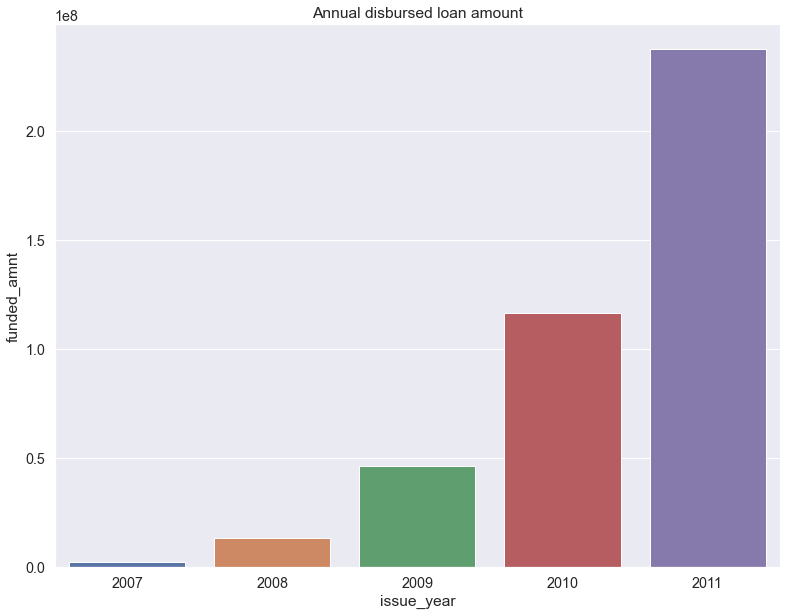

In [40]:
to_plot=df.groupby('issue_year')['funded_amnt'].sum()
plt.figure(figsize=(13,10))
print(to_plot)
sns.barplot(x=to_plot.index, y=to_plot).set(title='Annual disbursed loan amount')
plt.show()

<AxesSubplot:title={'center':'New loan amount per annum'}, xlabel='issue_year'>

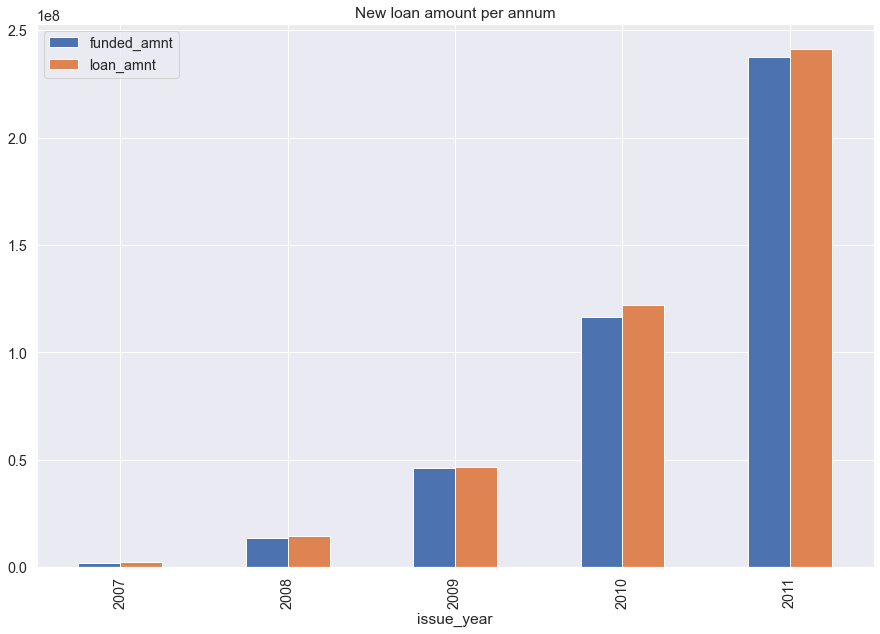

In [41]:
df.groupby('issue_year')[['funded_amnt', 'loan_amnt']].sum().plot.bar(figsize=(15,10), title='New loan amount per annum')

There is an almost exponential growth in the approved loan amount. This is an impressive growth!

##### Risk apetite and portfolio quality

Text(0.5, 1.0, 'Default rate per grade')

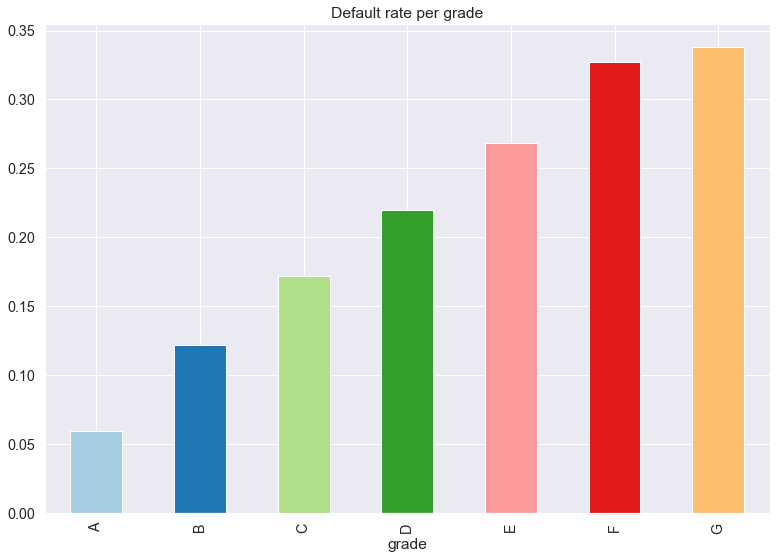

In [42]:
to_plot=(df[df.Defaulted].groupby('grade').count()/df.groupby('grade').count())['Defaulted']
to_plot.plot.bar(figsize=(13,9), color=plt.cm.Paired(np.arange(len(to_plot))))
plt.title('Default rate per grade')

The grades seem to represent the risk categories well!

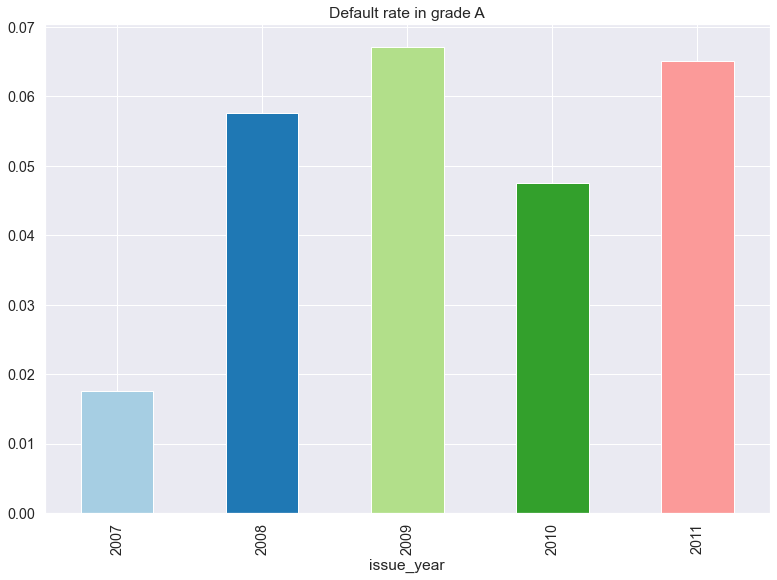

In [43]:
to_plot=(df[(df.Defaulted)&(df.grade=='A')].groupby('issue_year').count()/df[df.grade=='A'].groupby('issue_year').count())['Defaulted']
to_plot.plot.bar(figsize=(13,9), color=plt.cm.Paired(np.arange(len(to_plot))))
plt.title('Default rate in grade A')
plt.show()

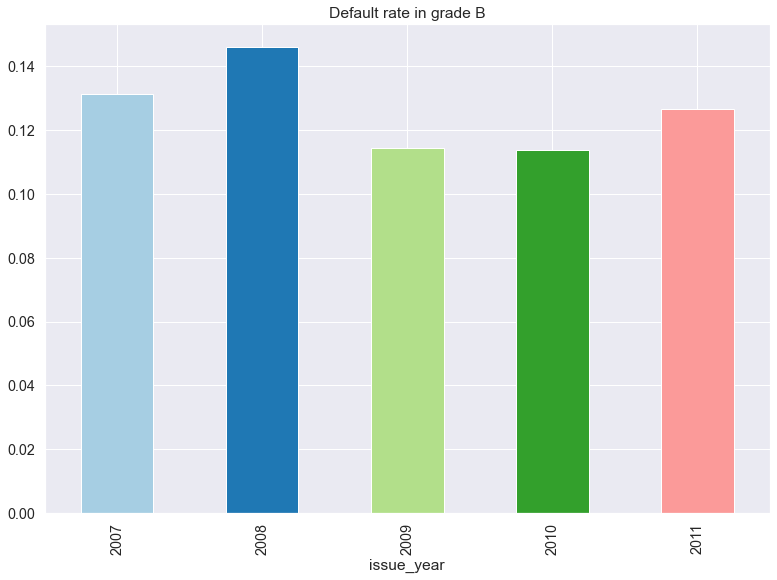

In [44]:
to_plot=(df[(df.Defaulted)&(df.grade=='B')].groupby('issue_year').count()/df[df.grade=='B'].groupby('issue_year').count())['Defaulted']
to_plot.plot.bar(figsize=(13,9), color=plt.cm.Paired(np.arange(len(to_plot))))
plt.title('Default rate in grade B')
plt.show()

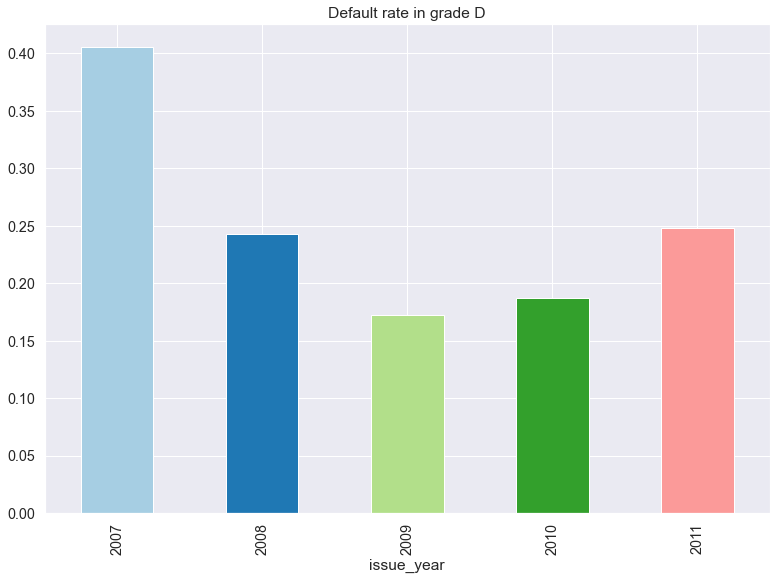

In [45]:
to_plot=(df[(df.Defaulted)&(df.grade=='D')].groupby('issue_year').count()/df[df.grade=='D'].groupby('issue_year').count())['Defaulted']
to_plot.plot.bar(figsize=(13,9), color=plt.cm.Paired(np.arange(len(to_plot))))
plt.title('Default rate in grade D')
plt.show()

The predicting power of the existing grading system seem to decline in the final years starting from 2009!

<AxesSubplot:title={'center':'Distribution of Grades'}, xlabel='issue_year'>

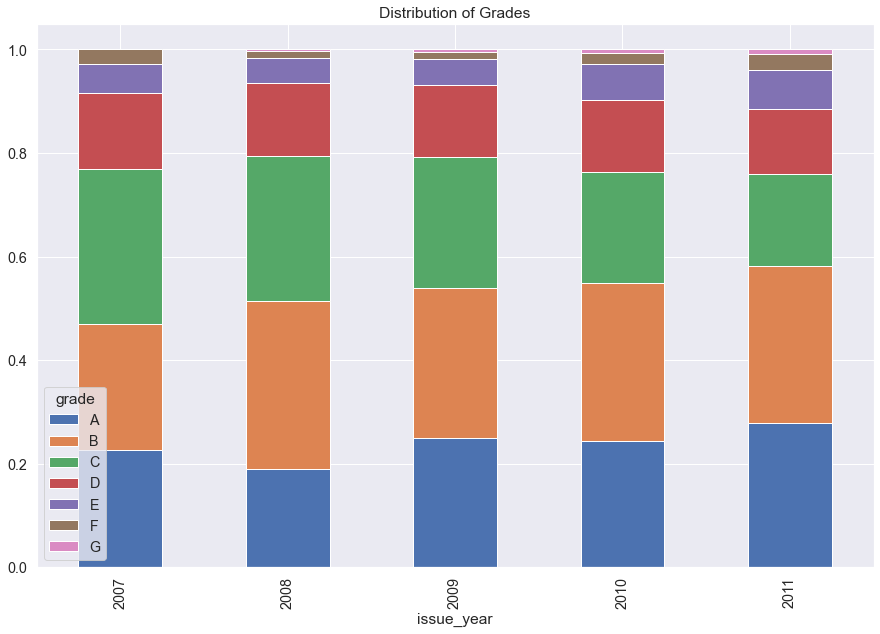

In [46]:
temp_table=pd.pivot_table(data=df, index='issue_year', columns='grade', values='funded_amnt', aggfunc='count')
temp_table.apply(lambda x: x/x.sum(), axis=1).plot(kind='bar', figsize=(15,10), stacked=True, title='Distribution of Grades')

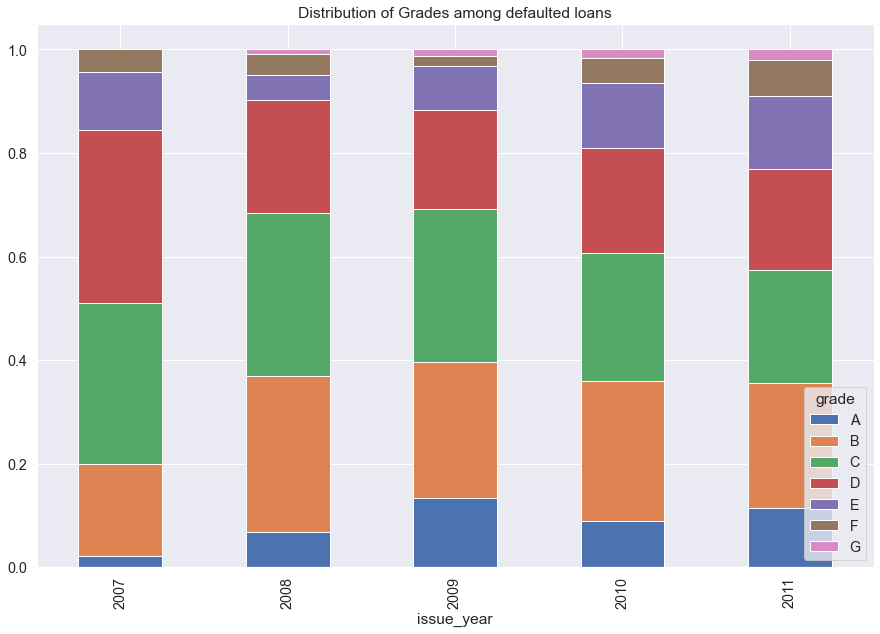

In [47]:
temp_table=pd.pivot_table(data=df[df.Defaulted], index='issue_year', columns='grade', values='funded_amnt', aggfunc='count')
temp_table.apply(lambda x: x/x.sum(), axis=1).plot(kind='bar', figsize=(15,10), stacked=True, title='Distribution of Grades among defaulted loans')
plt.show()

There is a small polarization in terms of quality. The proportion of the mid range decreases (C and D) while the lower quality grades (F and E) as well as the top grades B and A increase

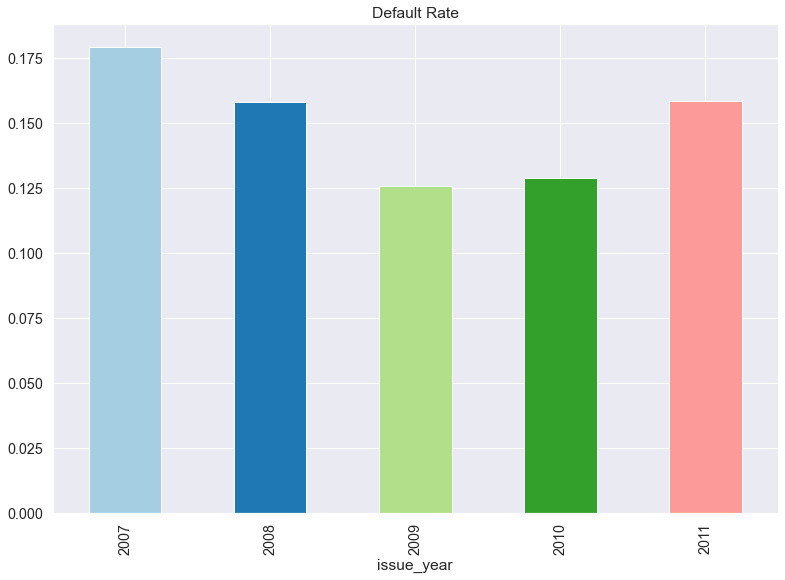

In [48]:
to_plot = (df[df.Defaulted].groupby('issue_year').count()/df.groupby('issue_year').count())['Defaulted']
to_plot.plot.bar(figsize=(13,9), color=plt.cm.Paired(np.arange(len(to_plot))))
plt.title('Default Rate')
plt.show()

#### Observation
As a result of the fast expansion, the performance issue of the grading system and the polarization of the portfolio, the portfolio health is declining. 


In [49]:
df.int_rate=df.int_rate.apply(lambda x : float(x[:-1]))

Mean interest rate: 11.9


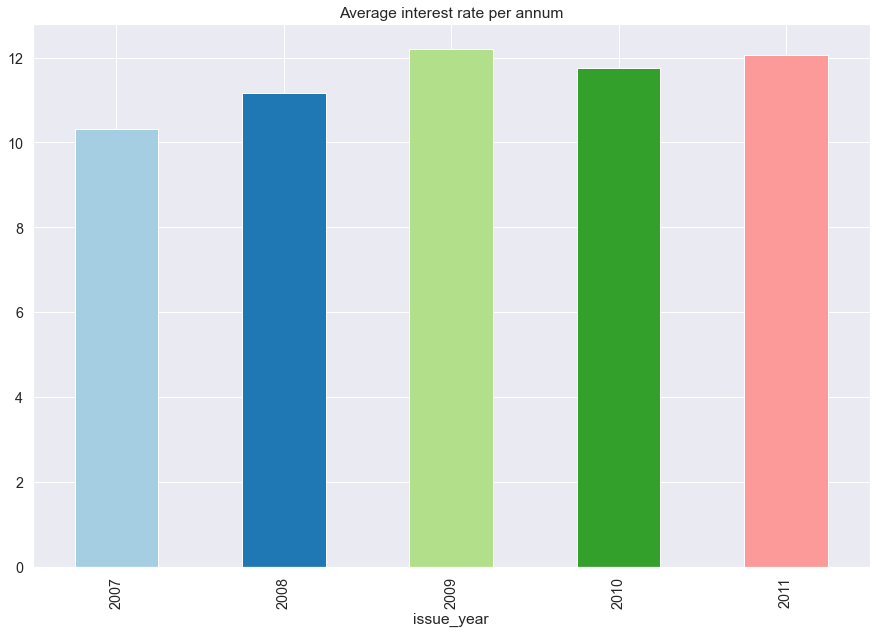

In [50]:
print('Mean interest rate:', df.int_rate.mean().round(1))
to_plot=df.groupby('issue_year')['int_rate'].mean()
to_plot.plot.bar(figsize=(15,10), color=plt.cm.Paired(np.arange(len(to_plot))))
plt.title('Average interest rate per annum')
plt.show()

The average interest rate per new deal slightly increases year by year. It might cover the increasing risk cost for a while but the approval process needs to be improved ineed. 

### Analysis of potential predictors

In [51]:
#Potential predictors
df_dict[df_dict.LoanStatNew.isin(Demographic_cols)]

,LoanStatNew,Description
2,addr_state,The state provided by the borrower in the loan...
4,annual_inc,The self-reported annual income provided by th...
16,dti,A ratio calculated using the borrower’s total ...
18,earliest_cr_line,The month the borrower's earliest reported cre...
19,emp_length,Employment length in years. Possible values ar...
26,home_ownership,The home ownership status provided by the borr...
41,loan_amnt,The listed amount of the loan applied for by t...
73,open_acc,The number of open credit lines in the borrowe...
85,pub_rec,Number of derogatory public records
86,pub_rec_bankruptcies,Number of public record bankruptcies


### IV. / 1. Creating helper function
The goal of the helper function is to encapsulate some of the repetitive tasks. The function **analyse** takes the column name as an input. The function:
- checks if the column has missing values
- in prints out some descriptive statistics
- creates certain visualization

It treats numerical and categorical variables differently. In case of numerical variables it visualizes the distribution of the respective column for both defaulted and non-defaulted cases. Additionally it also visualizes how the "default ratio" looks like in each quantile. 
For categorical variables it visualizes the default ration for each category. It also visualizes the size of the respective category to make sure that the conclusions drawn are based on an acceptable sample size. 

In [52]:
def analyse(column):
    
        #Calculating the number of missing values and printing the result accordingly
    missing=df[column].isnull().sum() 
    if missing>0:
        print('The column has ', missing,' missing values!!!','\n','\n')
        print('')
        print('')
    else:
        print('The column has no missing values!','\n','\n')

    #Creating plot and statistics for numerical variables
    if ((df[column].dtype == 'float64') | (df[column].dtype == 'int64')):
        print('Defaulted cases: ', '\n',df[df.Defaulted][column].describe(),'\n','\n') #Describing defaulted cases
        print('Non-defaulted cases: ', '\n',df[~(df.Defaulted)][column].describe(),'\n','\n')#Describing non-defaulted cases

    #Plotting boxplot for both defaulted and non-defaulted cases    
        plt.figure(figsize=(15,10))
        box_title = 'Distribution of {0} for defaulted and non-defaulted cases'.format(column)
        plt.title(box_title)
        sns.boxplot(data=df, x='Defaulted', y=column)
        plt.show()

    #Binning the data based on 10 quantiles and plotting the default rate for each quantile    
        plt.figure(figsize=(15,10))
        df_temp = df.copy() #Creating temporary dataframe for plotting
        df_temp['bins'] = pd.qcut(df[column], 10) #Creating bins and assigning it to a new column called 'bins'
        defaulted_count = df_temp[df_temp.Defaulted].groupby('bins')['addr_state'].count() #calculating the number of defaulted cases in each bin
        total_count = df_temp.groupby('bins')['addr_state'].count() #calculating the number of elements in each bin
        ratio_per_bins=defaulted_count/total_count #calculating default ratio for each bin
        ratio_per_bins.plot.bar(color=plt.cm.Paired(np.arange(len(ratio_per_bins))))
        plt.title('Default ratio in {0} deciles'.format(column))
        plt.xlabel('10 quantiles based bins')
        plt.ylabel('Default ratio')
        plt.show()
    

    #Creating plot and statistics for categorical variables
    else:
        print(df[column].describe(),'\n','\n')

        #Creating a new dataframe containing the default ratio and count for each category
        default_ratios = df[df.Defaulted][column].value_counts()/df[column].value_counts()#calculating default rate for each category
        count = df[column].value_counts() #value count for each category
        ratios = pd.concat([default_ratios, count], axis=1) #creating 'ratios' dataframe with two columns: Default Ratios and Count
        ratios.columns=['Default_Ratio', 'Count']

        print(ratios['Default_Ratio'].describe())

        #Plotting the ratios and counts for each category
        fig = plt.figure(figsize=(15,9))
        ax = fig.add_subplot(111)
        ax2=ax.twinx()
        
    
        
        ratios.Default_Ratio.plot(kind='bar', ax=ax, color='red', position=1, width = 0.3)
        ax.legend(loc="upper left")
    
        ratios.Count.plot(kind='bar', ax=ax2, position=0, width = 0.3, legend=True)
        ax2.legend(loc="upper right")
        ax2.set_ylabel('Record Count', size=14)
        
        plt.title('Default ratio and number of records per {0} category'.format(column), fontsize=20)
        ax.set_ylabel('Default ratio', size=14)
        

        plt.show()

        #Plotting the box plot (default ratios of categories)
        plt.figure(figsize=(15,10))
        ratios.Default_Ratio.plot.box(fontsize=14)

        plt.show()



### IV. / 2. Analysis

##### State of the borrower

The column has no missing values! 
 

count     38577
unique       50
top          CA
freq       6949
Name: addr_state, dtype: object 
 

count    47.000000
mean      0.150059
std       0.073328
min       0.050000
25%       0.123369
50%       0.139373
75%       0.158544
max       0.600000
Name: Default_Ratio, dtype: float64


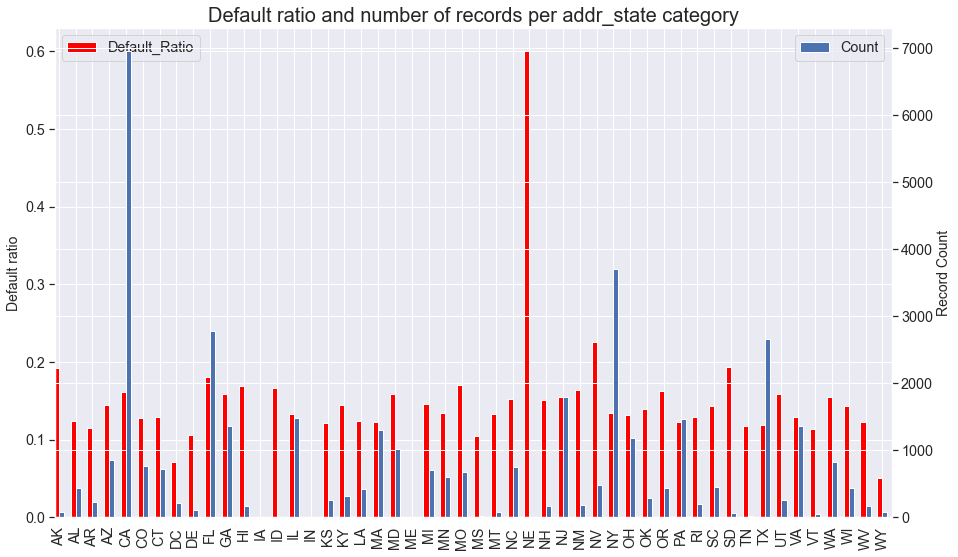

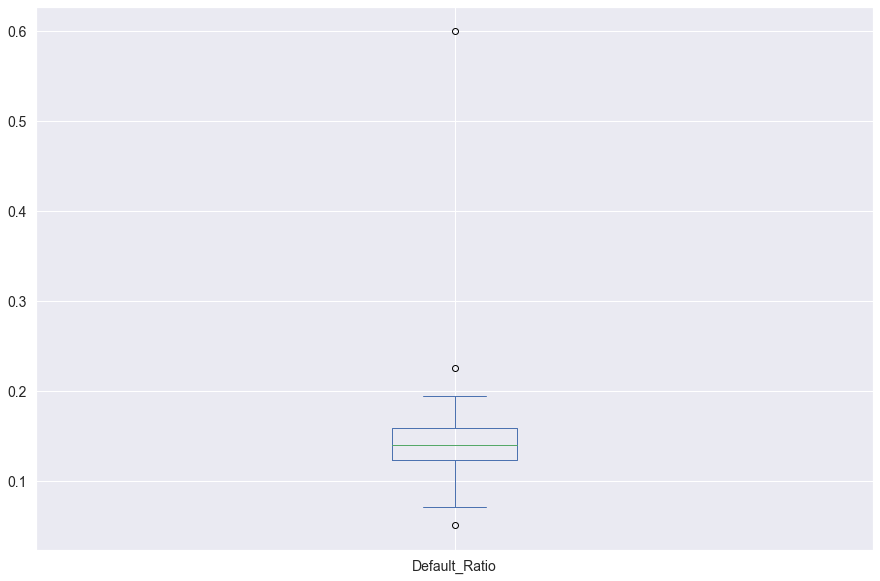

In [53]:
analyse('addr_state')

In [54]:
len(df[df.Defaulted])/len(df)

0.14586411592399617

In [55]:
#Checking Nebraska cases
df[df['addr_state']=='NE']

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,Defaulted,issue_year
38685,7500,7500,810.424915,36 months,12.61,251.30,D,D1,10+ years,MORTGAGE,...,9046.732271,831.55,7499.99,1546.74,May-11,251.86,Nov-12,0.0,False,2008
39500,14400,14400,124.994746,36 months,12.80,483.81,D,D4,1 year,RENT,...,5511.150000,47.32,2812.13,2024.47,Oct-09,50.03,Feb-10,NaN,True,2007
39651,4800,4800,3075.000000,36 months,11.22,157.66,C,C4,5 years,RENT,...,5675.572528,3635.91,4800.00,875.57,Sep-10,160.09,Aug-14,NaN,False,2007
39667,2500,2500,675.000000,36 months,12.80,84.00,D,D4,< 1 year,MORTGAGE,...,2220.610000,599.28,1706.01,477.21,Mar-10,1.76,May-16,NaN,True,2007
39668,2500,2500,825.000000,36 months,9.64,80.26,B,B4,< 1 year,MORTGAGE,...,2086.630000,688.35,1730.83,354.44,Mar-10,1.40,May-16,NaN,True,2007


#### Observation:
Majority of default ratios per states is between 10% and 20% with the mean of 15%. It is in line with the overall default rate of the dataset (14.5%). The only real outlier is Nebraska. In this case however we only have 5 data points so no real correlation can be inferred.  

##### Annual income

The column has no missing values! 
 

Defaulted cases:  
 count    5.627000e+03
mean     6.242730e+04
std      4.777601e+04
min      4.080000e+03
25%      3.700000e+04
50%      5.300000e+04
75%      7.500000e+04
max      1.250000e+06
Name: annual_inc, dtype: float64 
 

Non-defaulted cases:  
 count    3.295000e+04
mean     6.986250e+04
std      6.656225e+04
min      4.000000e+03
25%      4.113275e+04
50%      6.000000e+04
75%      8.400000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64 
 



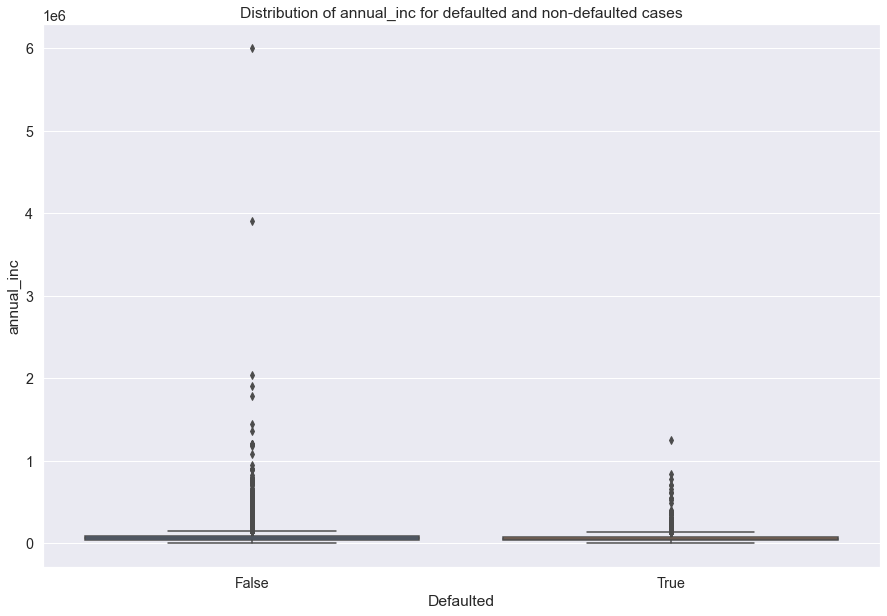

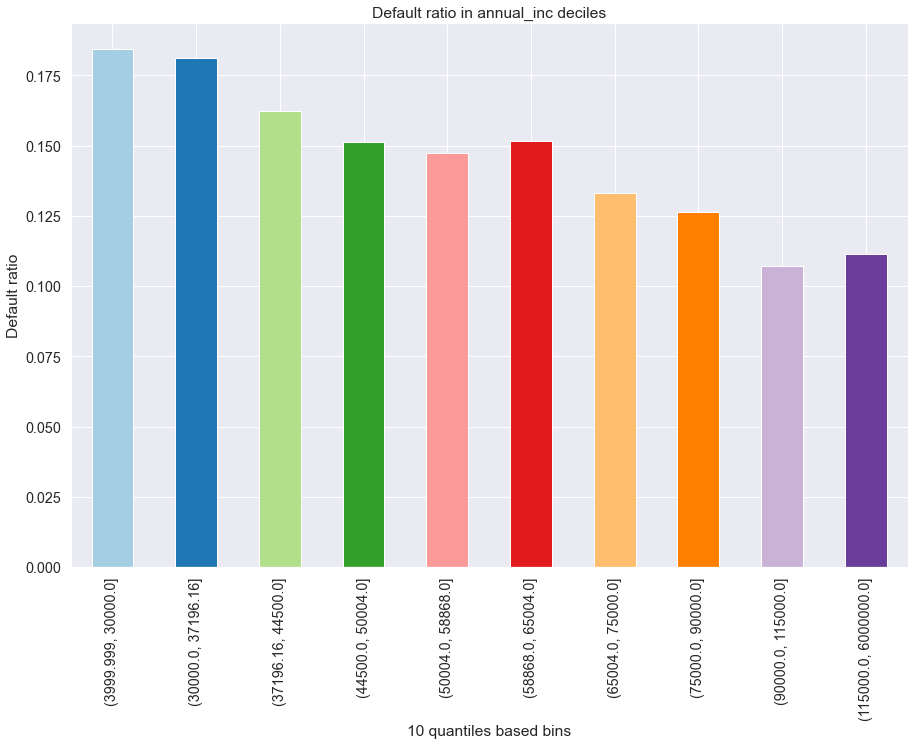

In [56]:
analyse('annual_inc')

The numerical values show that mean salary of those who are non-defaulted is higher than among those who went into default. But it is hard to see it visually. 

#### Trying different ways to visualize it:

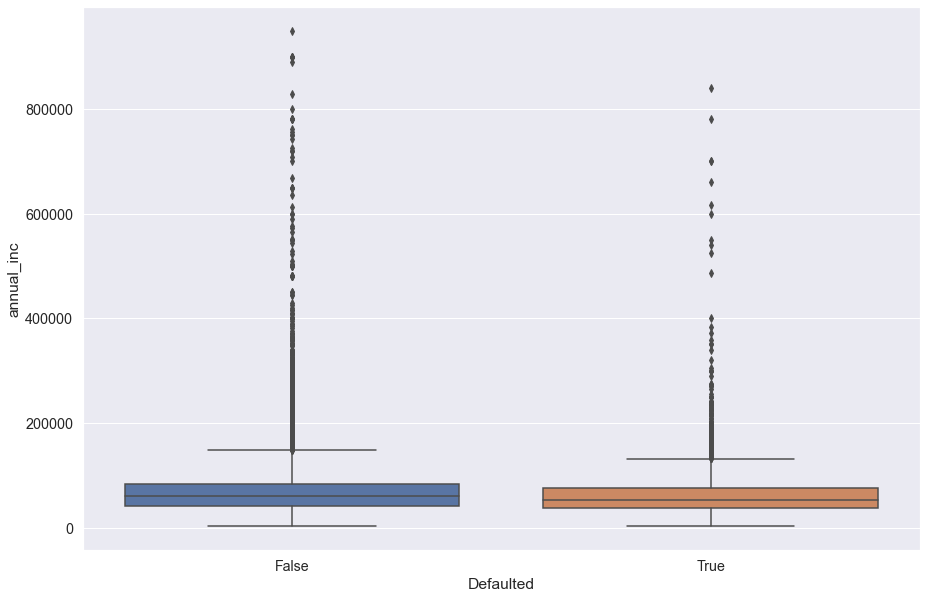

In [57]:
#removing some of the top payers for a better visualization (Note, it has an impact on the values as well!)
ndf=df[df.annual_inc < 1000000]
plt.figure(figsize=(15,10))
sns.boxplot(data=ndf, x='Defaulted', y='annual_inc')
plt.show()

<AxesSubplot:ylabel='Frequency'>

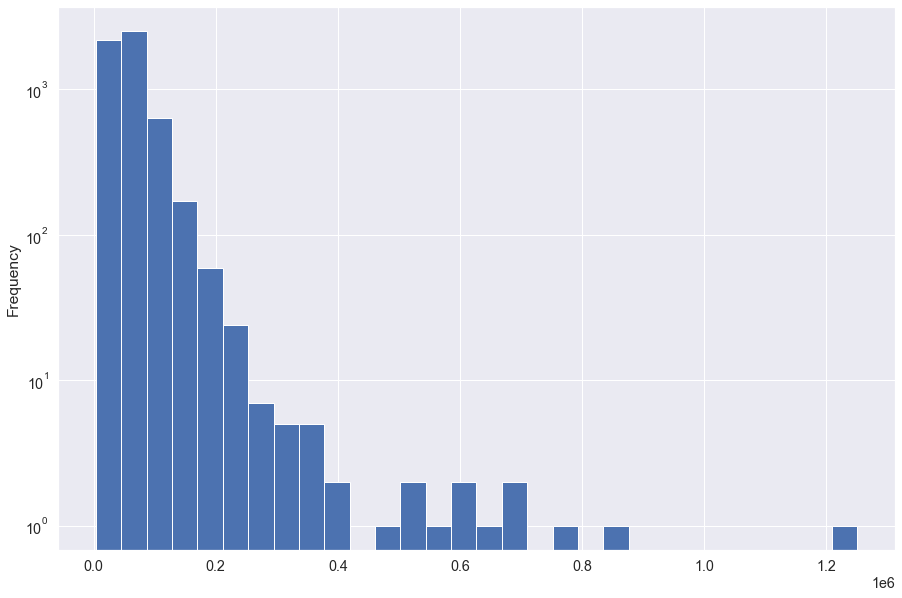

In [58]:
#visializing the defaulted cases on log scale
fig = plt.figure(figsize=(15,10))
df[df.Defaulted].annual_inc.plot.hist(bins=30, logy=True )

<AxesSubplot:ylabel='Frequency'>

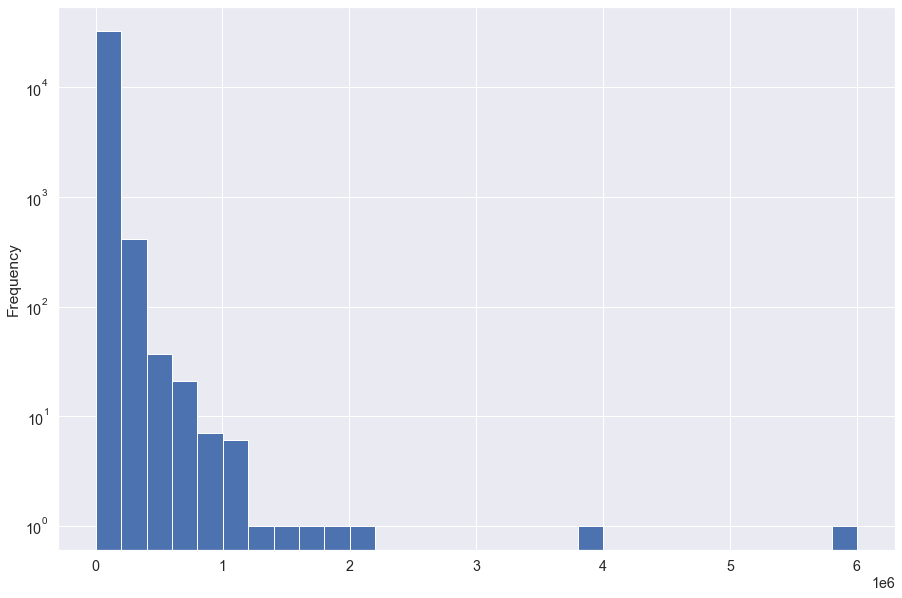

In [59]:
# visializing the non-defaulted cases on log scale
fig = plt.figure(figsize=(15,10))
df[~(df.Defaulted)].annual_inc.plot.hist(bins=30, logy=True)

#### Observation:
The average salary among those who defaulted is lower than the average salary among those who are not in default. The picture is even more clear if we bin the income into different income categories and check the default ratio in each category. It is clear that among the top earners the default rate is lower than among the least earners and the highter the income category the lower the default rate is.

##### DTI

The column has no missing values! 
 

Defaulted cases:  
 count    5627.000000
mean       14.000624
std         6.585577
min         0.000000
25%         9.050000
50%        14.290000
75%        19.290000
max        29.850000
Name: dti, dtype: float64 
 

Non-defaulted cases:  
 count    32950.000000
mean        13.148421
std          6.680041
min          0.000000
25%          7.980000
50%         13.200000
75%         18.390000
max         29.990000
Name: dti, dtype: float64 
 



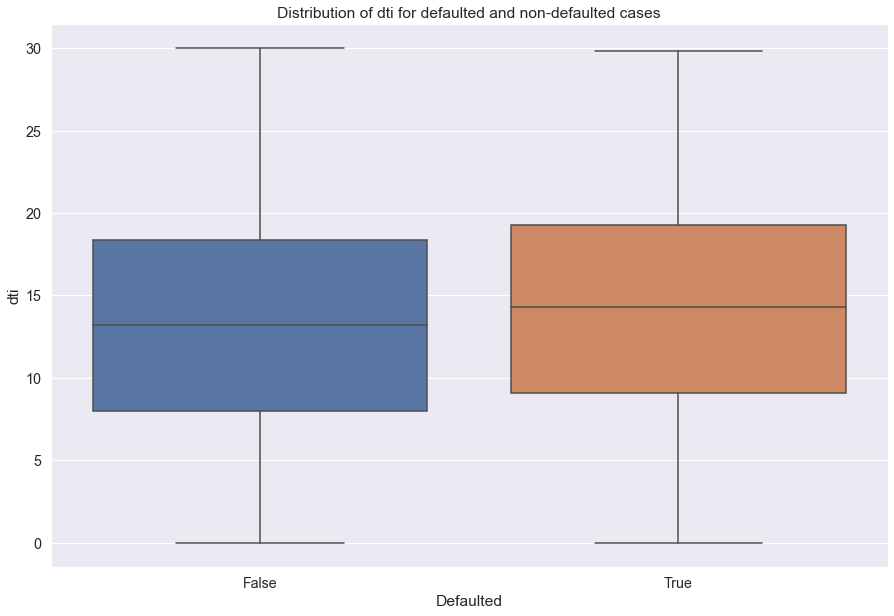

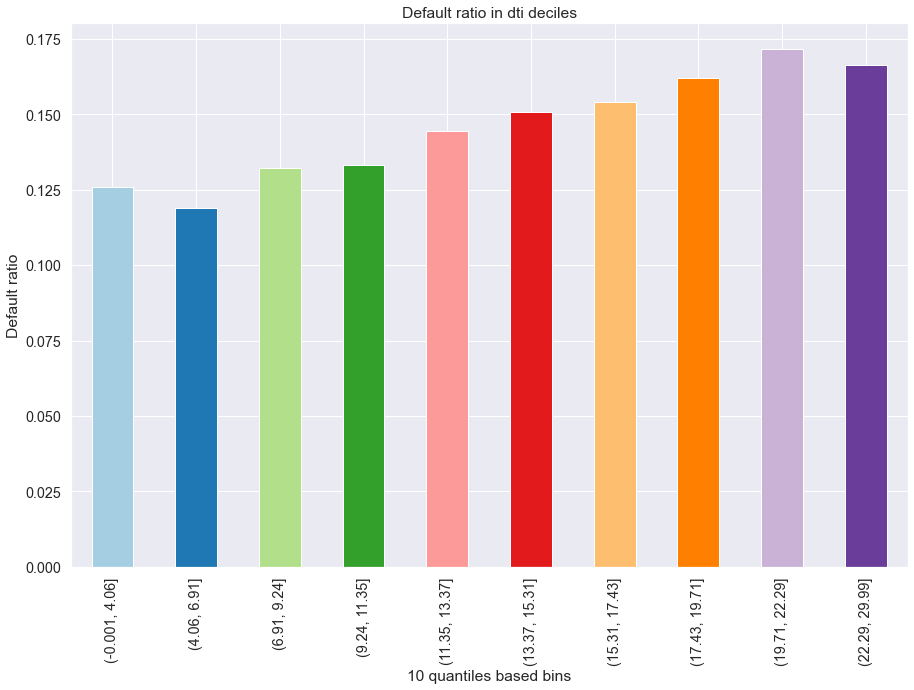

In [60]:
analyse('dti')

#### Observation:
The debt to income ratio is a clear signal for potential future default. The higher the overall debt amount of the applicant compared compared the applicant's monthly income, the higher the chances are for a future default. 
The mean dti ratio is higher for those who defaulted and also the higher the dti bin is, the higher the default rates are. It is in line with our intuition. If the monthly income is utilized by different debt services more, there is less "reserve" left for covering difficult situations.  

In [61]:
df.loc[:,['annual_inc', 'dti']].corr()

,annual_inc,dti
annual_inc,1.00000,-0.12153
dti,-0.12153,1.00000


##### Earlyest Credit Line

In [62]:
df.earliest_cr_line

0        Jan-85
1        Apr-99
2        Nov-01
3        Feb-96
5        Nov-04
          ...  
39712    Nov-90
39713    Dec-86
39714    Oct-98
39715    Nov-88
39716    Oct-03
Name: earliest_cr_line, Length: 38577, dtype: object

In [63]:
#Converting it to datetime
df['earliest_cr_datetime']=pd.to_datetime(df.earliest_cr_line.apply(lambda x: x.replace('-', '/')), format=('%b/%y'))
df['earliest_cr_year']=pd.DatetimeIndex(df.earliest_cr_datetime).year.astype(str)

The column has no missing values! 
 

count     38577
unique       53
top        2000
freq       3160
Name: earliest_cr_year, dtype: object 
 

count    46.000000
mean      0.150682
std       0.056010
min       0.043011
25%       0.124172
50%       0.143728
75%       0.161745
max       0.400000
Name: Default_Ratio, dtype: float64


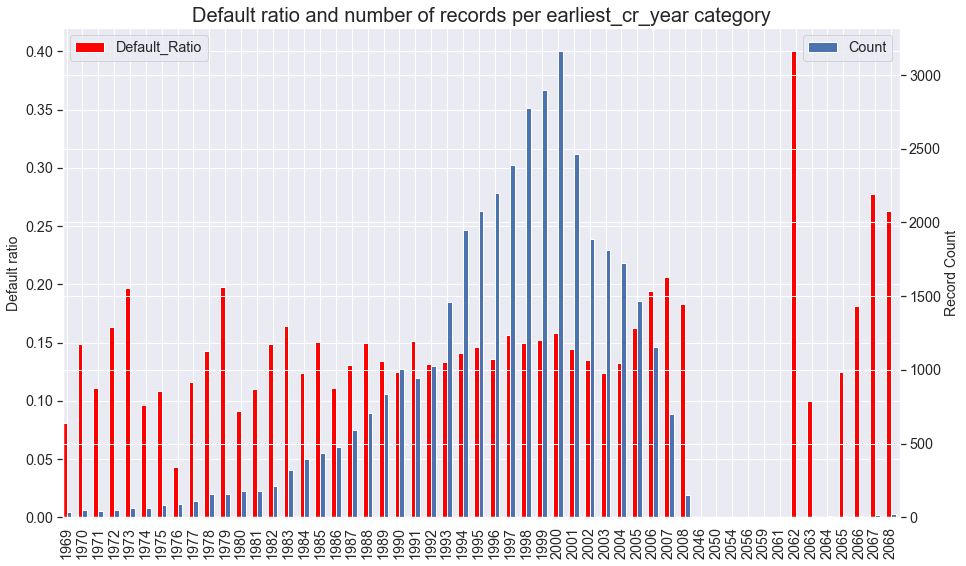

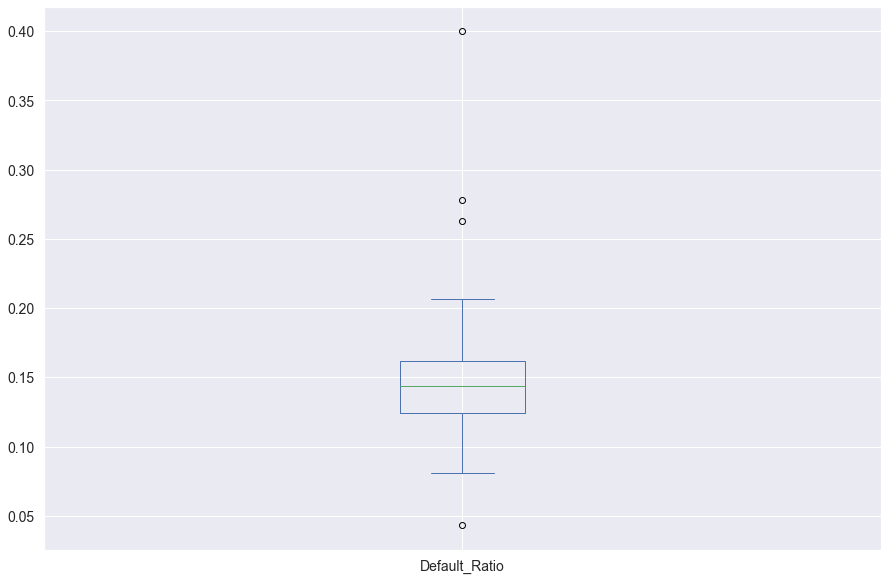

In [64]:
analyse('earliest_cr_year')

In [65]:
len(df[df.earliest_cr_year.astype(int)>2020])

85

There are 85 cases where there is data quality issue. Since the most common value is 2000, we replace the future values with 2000

In [66]:
df.earliest_cr_year=df.earliest_cr_year.apply(lambda x: '2000' if int(x)>2008 else x)

The column has no missing values! 
 

count     38577
unique       40
top        2000
freq       3245
Name: earliest_cr_year, dtype: object 
 

count    40.000000
mean      0.139610
std       0.032469
min       0.043011
25%       0.124090
50%       0.142014
75%       0.153639
max       0.206304
Name: Default_Ratio, dtype: float64


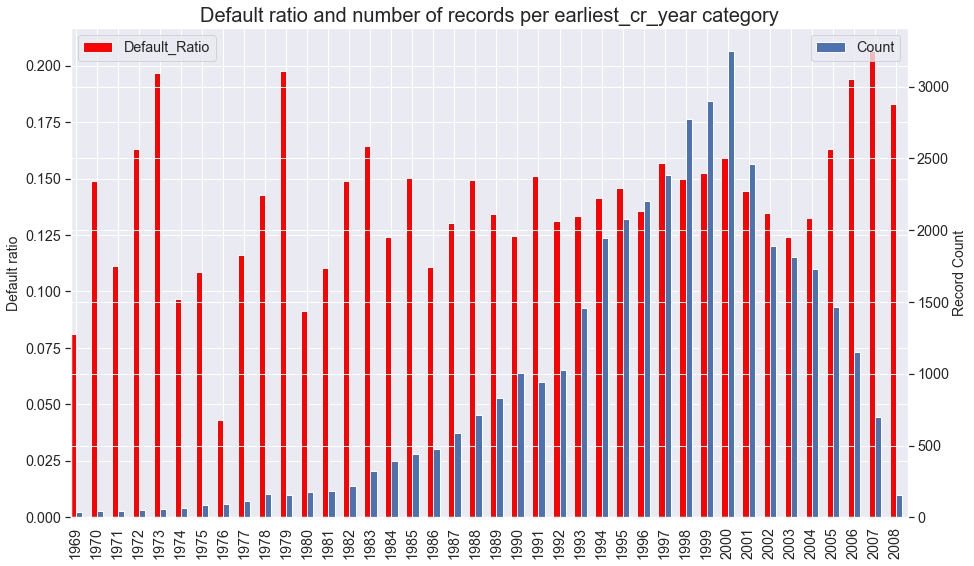

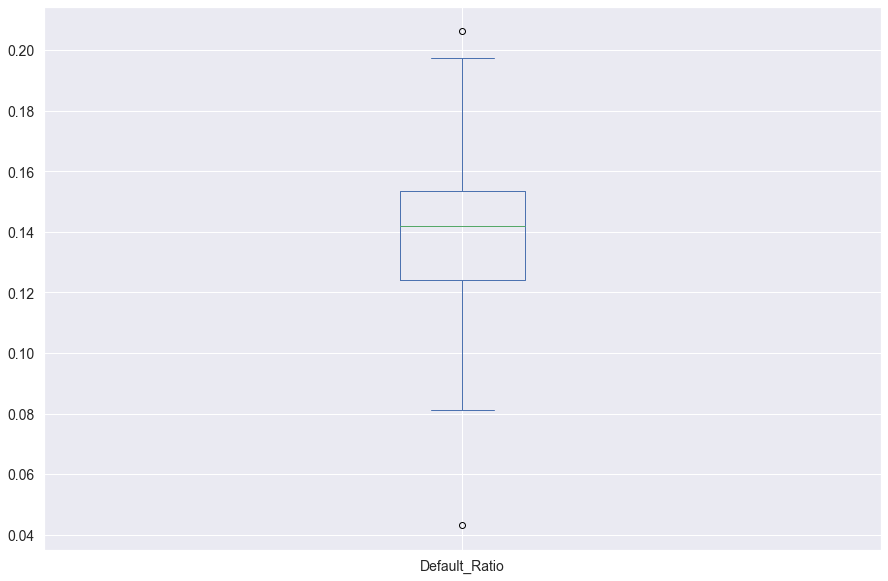

In [67]:
analyse('earliest_cr_year')

In [68]:
df['earliest_cr_month']=pd.DatetimeIndex(df.earliest_cr_datetime).month.astype(str)

The column has no missing values! 
 

count     38577
unique       12
top          10
freq       3967
Name: earliest_cr_month, dtype: object 
 

count    12.000000
mean      0.146571
std       0.009667
min       0.131199
25%       0.140726
50%       0.147189
75%       0.152256
max       0.160913
Name: Default_Ratio, dtype: float64


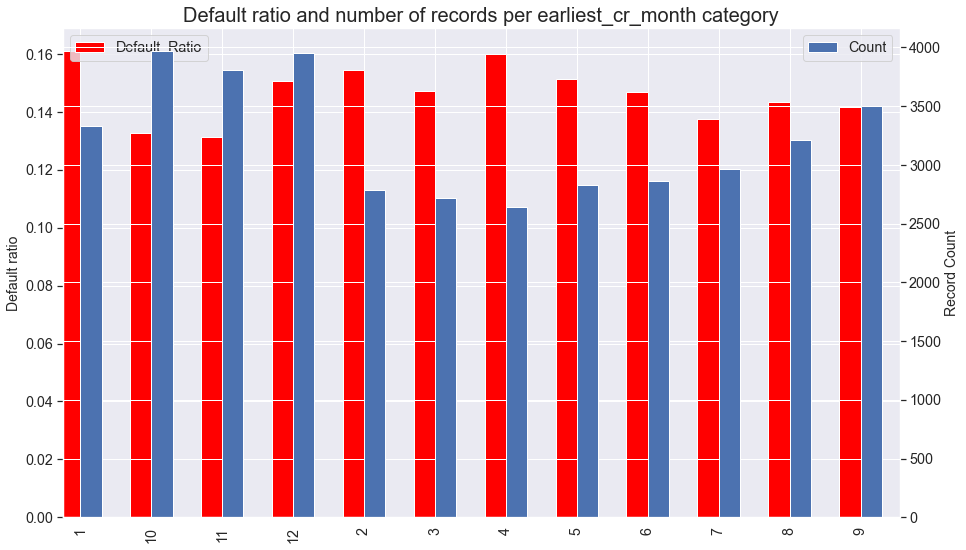

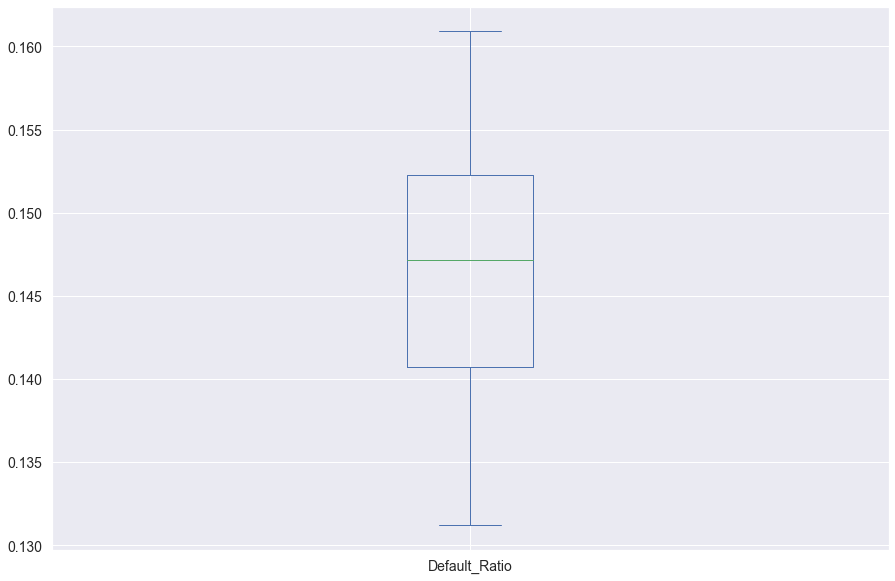

In [69]:
analyse('earliest_cr_month')

visualizing in correct order:

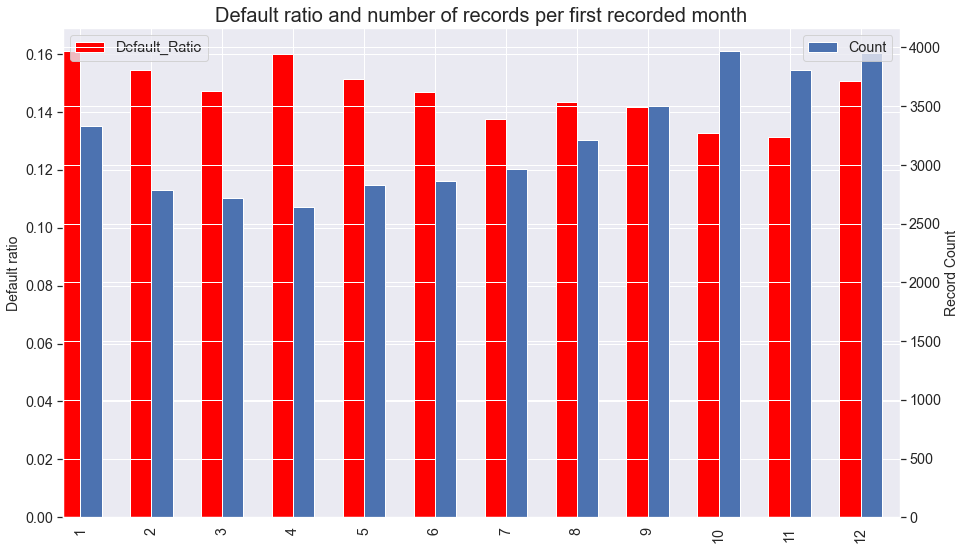

In [70]:

temp = df.copy()
temp['earliest_cr_month']=temp['earliest_cr_month'].astype(int)
default_ratios = temp[(temp.Defaulted)]['earliest_cr_month'].value_counts()/temp['earliest_cr_month'].value_counts()#calculating default rate for each category
count = temp['earliest_cr_month'].value_counts() #value count for each category
ratios = pd.concat([default_ratios, count], axis=1) #creating 'ratios' dataframe with two columns: Default Ratios and Count
ratios.columns=['Default_Ratio', 'Count']

#Plotting the ratios and counts for each category
fig = plt.figure(figsize=(15,9))
ax = fig.add_subplot(111)
ax2=ax.twinx()



ratios.Default_Ratio.plot(kind='bar', ax=ax, color='red', position=1, width = 0.3)
ax.legend(loc="upper left")

ratios.Count.plot(kind='bar', ax=ax2, position=0, width = 0.3, legend=True)
ax2.legend(loc='upper right')
ax2.set_ylabel('Record Count', size=14)

plt.title('Default ratio and number of records per first recorded month', fontsize=20)
ax.set_ylabel('Default ratio', size=14)


plt.show()

#### Observation
There is an interesting trend in the number of 'first reported credit lines'. More information would be needed on how the data was collected to conclude more on this. There is no clear trend however that would suggest that 'the earliest credit line' date has a significant correlation with the default likelyhood.

##### emp_lenght

The column has no missing values! 
 

count         38577
unique           11
top       10+ years
freq           9521
Name: emp_length, dtype: object 
 

count    11.000000
mean      0.142468
std       0.009543
min       0.128874
25%       0.138288
50%       0.141605
75%       0.143644
max       0.163743
Name: Default_Ratio, dtype: float64


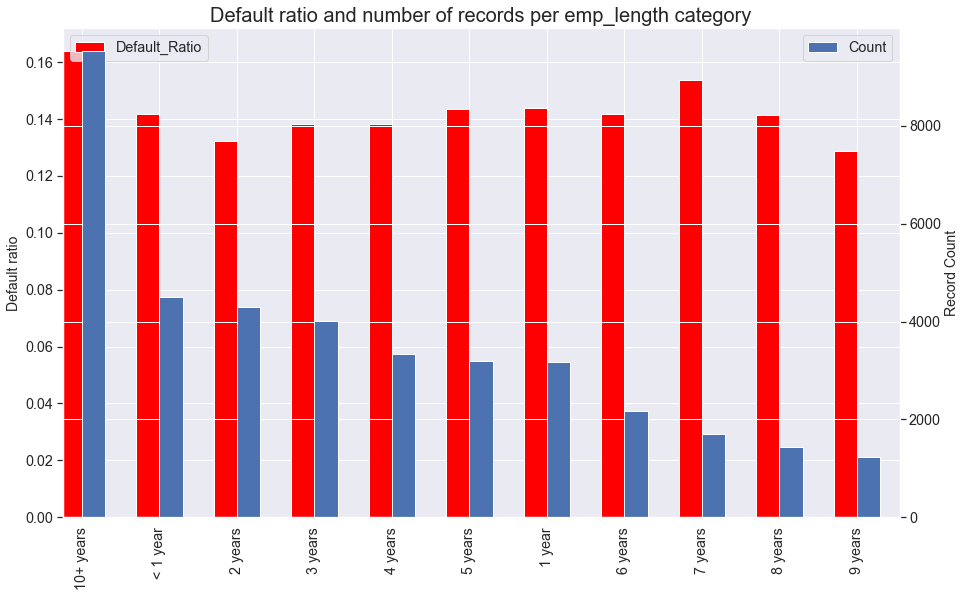

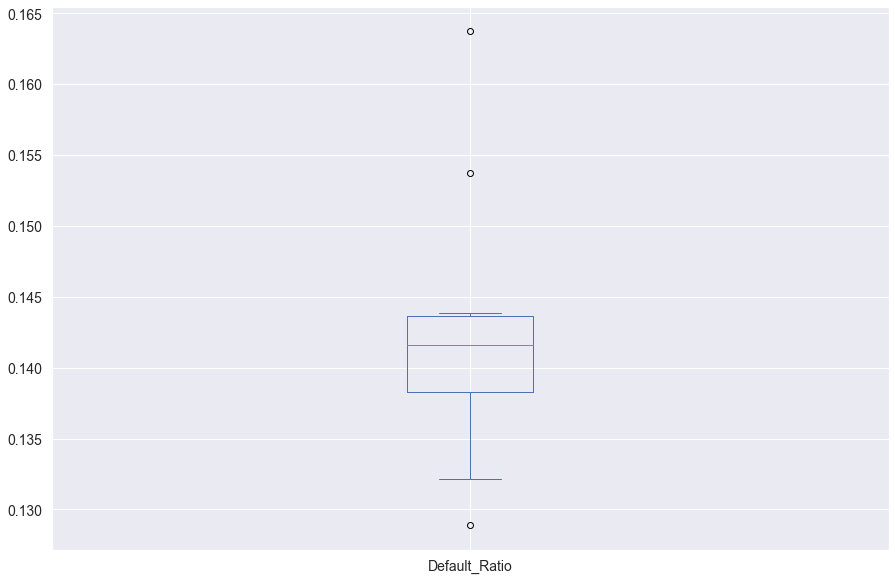

In [71]:
analyse('emp_length')

#### Observation
There is a clear trend in the number of applicant per employment years. There are less and less applicants as the employment year grows that is kind of logical. The 10+ category is a 'cumulative' one that explains the higher count in that category. There is however no clear trend that would indicate correlation between years and default likelyhood. 

##### Home ownership

The column has no missing values! 
 

count     38577
unique        5
top        RENT
freq      18480
Name: home_ownership, dtype: object 
 

count    4.000000
mean     0.155730
std      0.019945
min      0.136713
25%      0.145859
50%      0.151267
75%      0.161138
max      0.183673
Name: Default_Ratio, dtype: float64


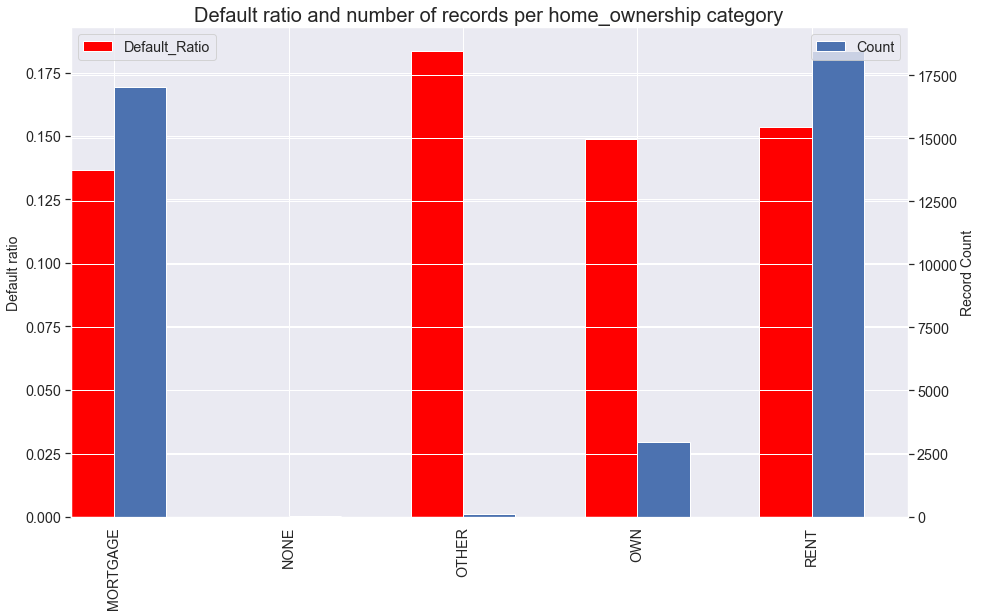

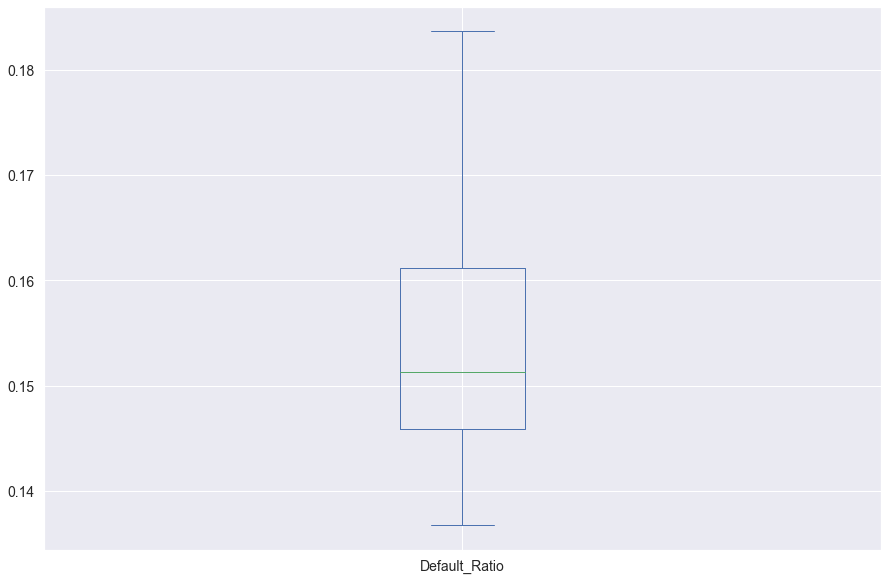

In [72]:
analyse('home_ownership')

#### Observation
The numbers reinforce the intution meaning that those who have mortgage on their own house (the ones who have something to lose) are slightly less likely to go default than those who have less to lose (renting or own house but with no mortgage). The difference however is not huge. 

##### Loan amount

The column has no missing values! 
 

Defaulted cases:  
 count     5627.000000
mean     12104.385108
std       8085.732038
min        900.000000
25%       5600.000000
50%      10000.000000
75%      16500.000000
max      35000.000000
Name: loan_amnt, dtype: float64 
 

Non-defaulted cases:  
 count    32950.000000
mean     10866.455994
std       7199.629493
min        500.000000
25%       5200.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64 
 



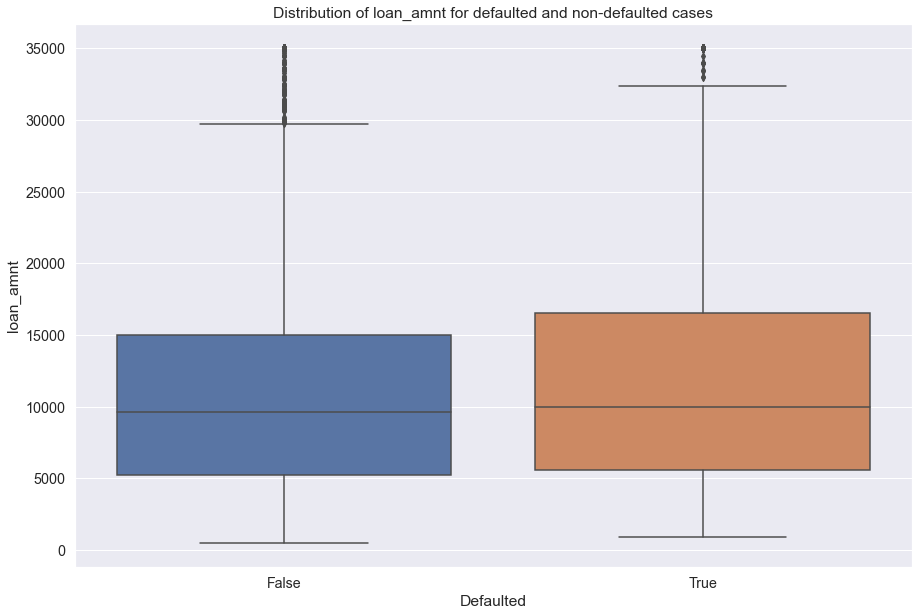

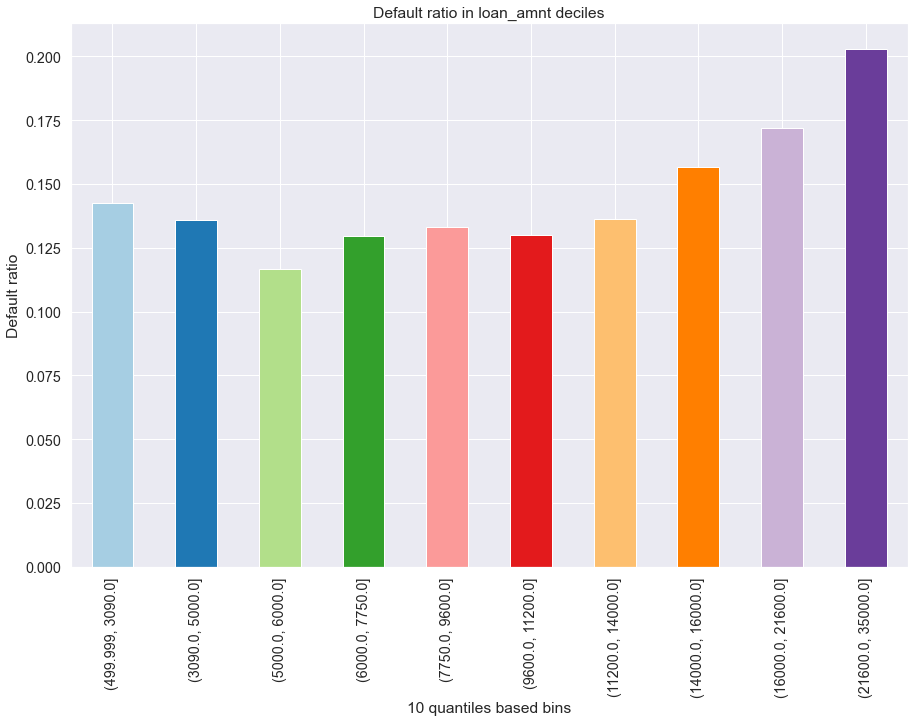

In [73]:
analyse('loan_amnt')

#### Observation
The loan amount is a clear indicator. Looking at the distribution of loan amounts for defaulted and non-defaulted cases we can observe higher mean loan amount for defaulted cases.
If we look at the quantile binned chart we can observe that there is a decreasing trend for the first three quantiles meaning that the higher the loan amount, the lower the chanches for default are. From the 4th quantile however the trend changes and there is a strong increase for the last 3 quantiles. 
Default rate is higher in case of higher loan amounts, but we see and increased rate for the lower end as well.

##### Public record

In [74]:
df['pub_rec'].value_counts()

0    36507
1     2013
2       48
3        7
4        2
Name: pub_rec, dtype: int64

In [75]:
# It is better to treat it as ordinal categorycal variable
df['pub_rec']=df['pub_rec'].apply(lambda x : str(x))

The column has no missing values! 
 

count     38577
unique        5
top           0
freq      36507
Name: pub_rec, dtype: object 
 

count    3.000000
mean     0.192233
std      0.045053
min      0.141343
25%      0.174838
50%      0.208333
75%      0.217679
max      0.227024
Name: Default_Ratio, dtype: float64


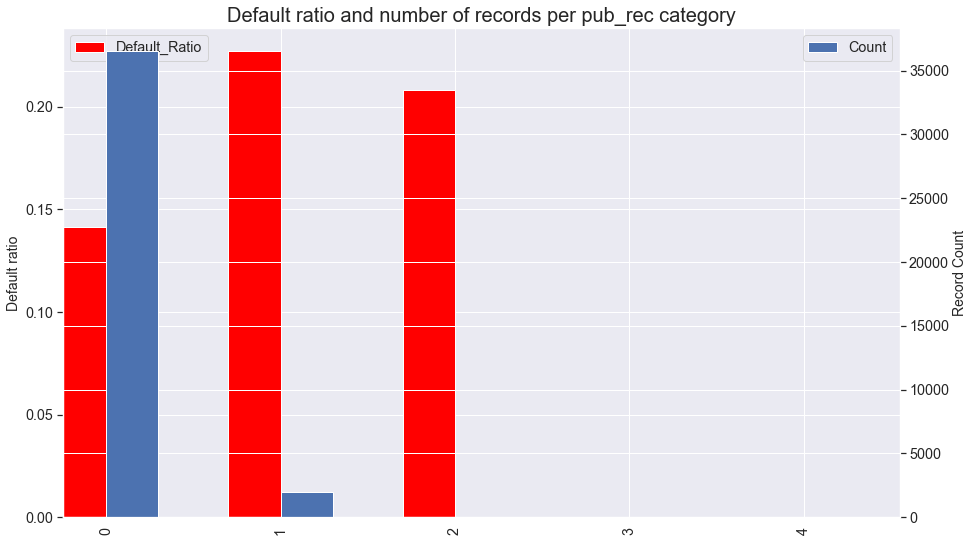

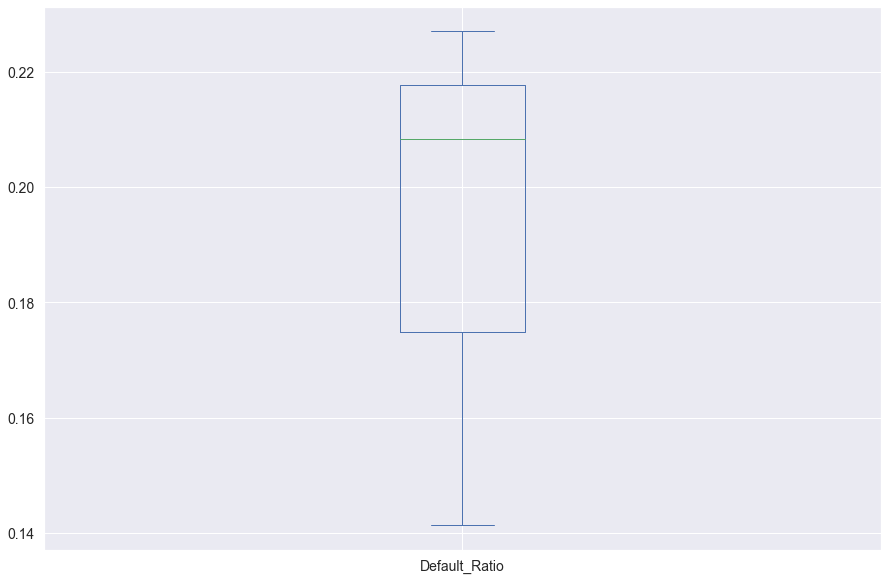

In [76]:
analyse('pub_rec')

#### Observation
There is not enough data in categories other than '0' for drawing conclusion 

##### Public record bankruptcies

In [77]:
df.pub_rec_bankruptcies.isnull().sum()

697

In [78]:
df.pub_rec_bankruptcies.value_counts()

0.0    36238
1.0     1637
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

#### Observation
There is not enough data in categories other than '0' for drawing conclusion 

##### Purpose

The column has no missing values! 
 

count                  38577
unique                    14
top       debt_consolidation
freq                   18055
Name: purpose, dtype: object 
 

count    14.000000
mean      0.150434
std       0.044519
min       0.103256
25%       0.111037
50%       0.154454
75%       0.163024
max       0.270810
Name: Default_Ratio, dtype: float64


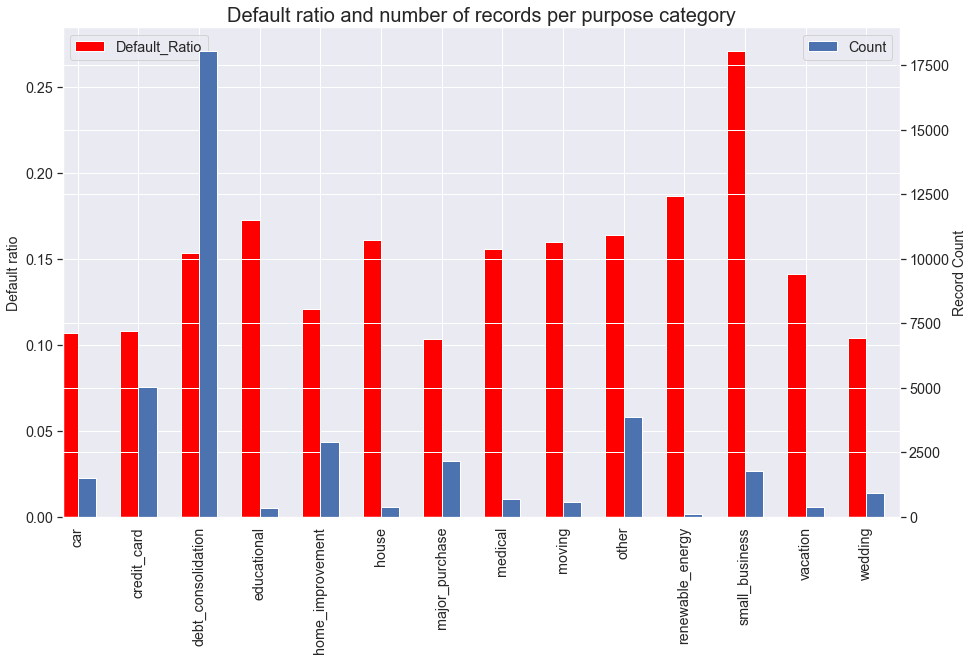

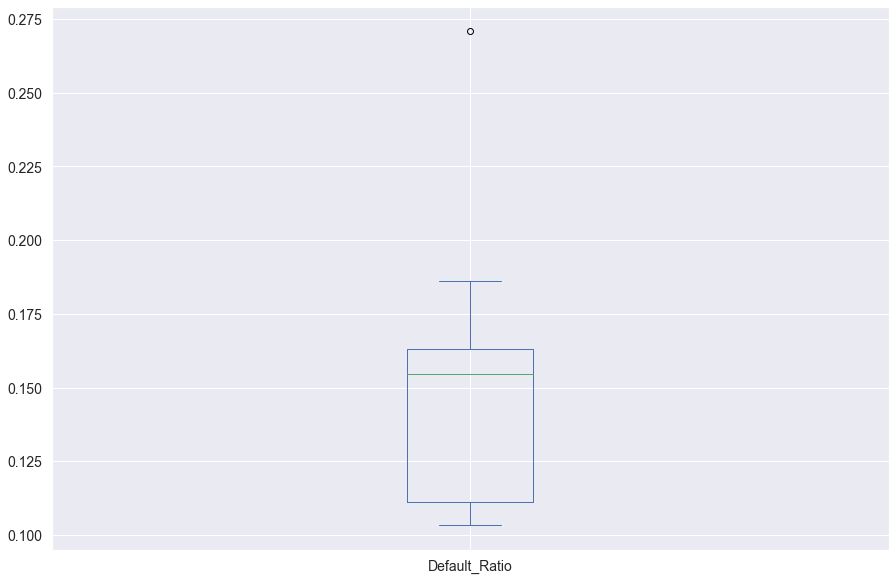

In [79]:
analyse('purpose')

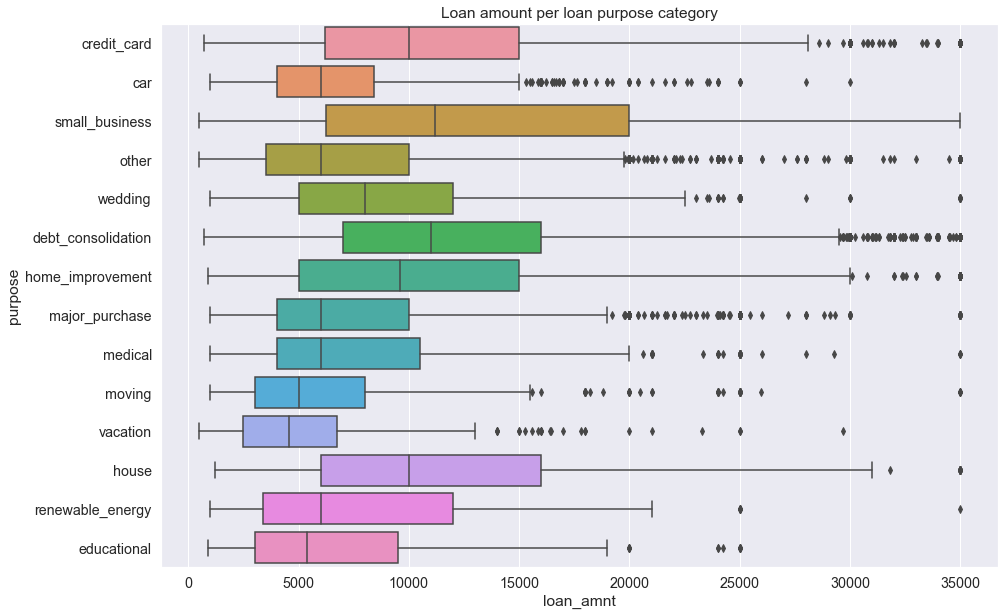

In [80]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df, x='loan_amnt', y='purpose', orient='horisontal')
plt.title('Loan amount per loan purpose category')
plt.show()

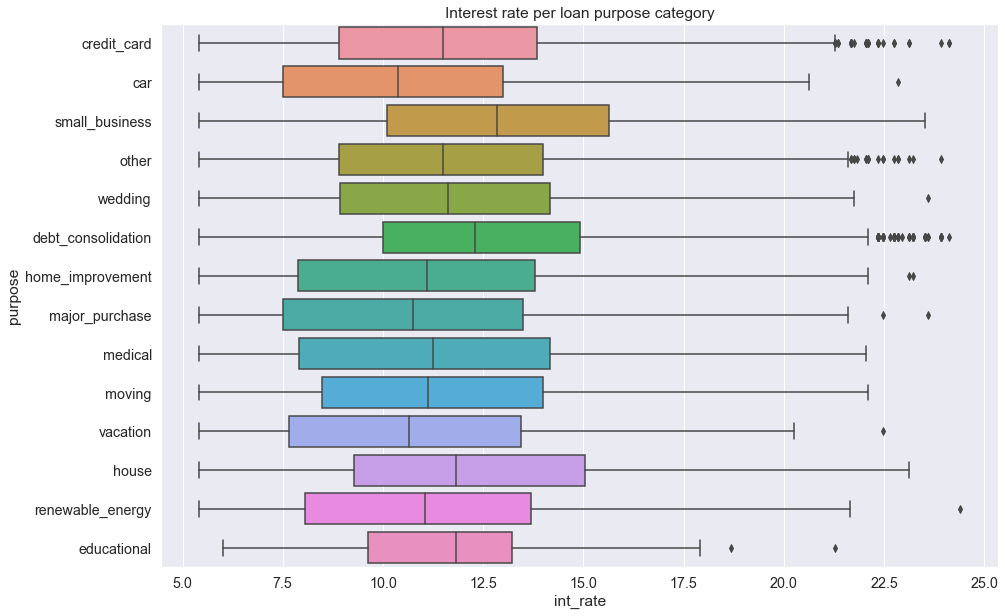

In [81]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df, x='int_rate', y='purpose', orient='horisontal')
plt.title('Interest rate per loan purpose category')
plt.show()

#### Observation
There is a clear difference in the default ratios of the categories. The "Small business" stands out as the category with by far the highest default rate. But it is also the one with the highest average deal amount (where we already observed correlation between the default ratio and the loan amount. Looking at different categories however we see that the category itself has a predicting power. Debt consolitation for instance has the second largest mean loan size, but in terms of default ration it is only in the middle.

#### Term

The column has no missing values! 
 

count          38577
unique             2
top        36 months
freq           29096
Name: term, dtype: object 
 

count    2.000000
mean     0.182023
std      0.100571
min      0.110909
25%      0.146466
50%      0.182023
75%      0.217581
max      0.253138
Name: Default_Ratio, dtype: float64


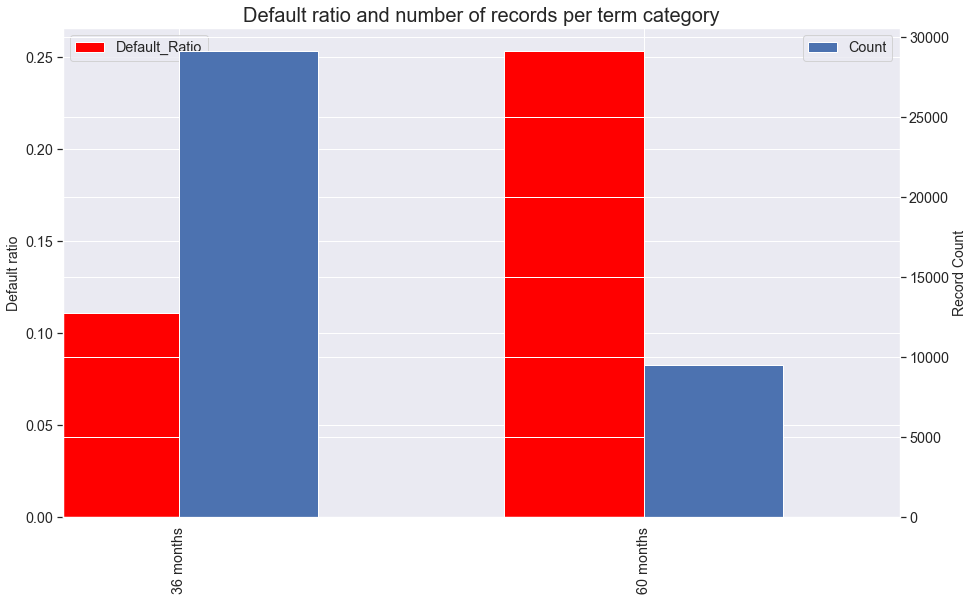

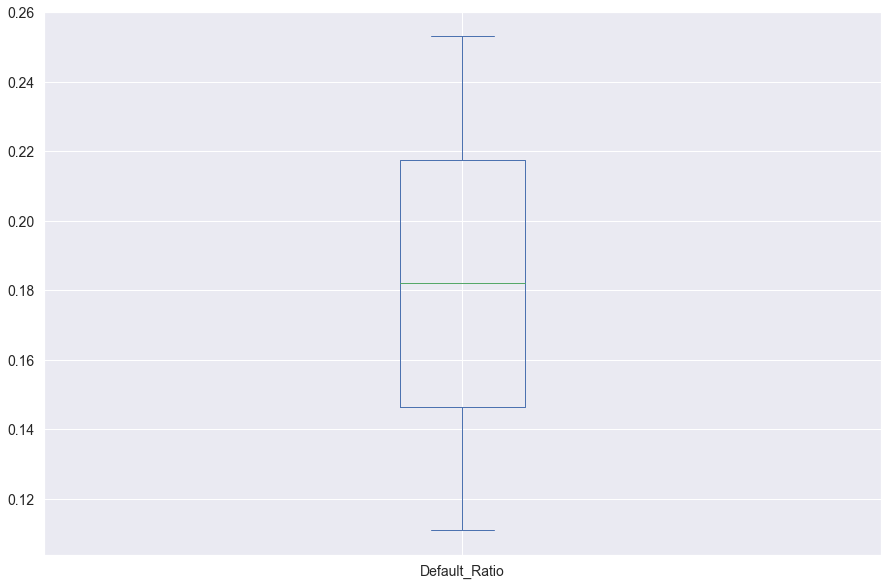

In [82]:
analyse('term')

<AxesSubplot:xlabel='term', ylabel='loan_amnt'>

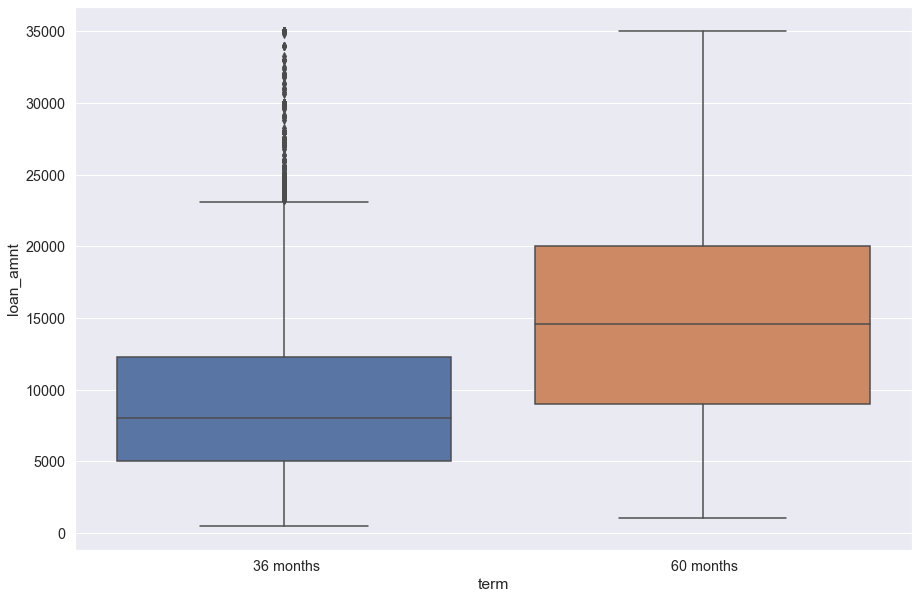

In [83]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df, x='term', y='loan_amnt')

<AxesSubplot:xlabel='term', ylabel='int_rate'>

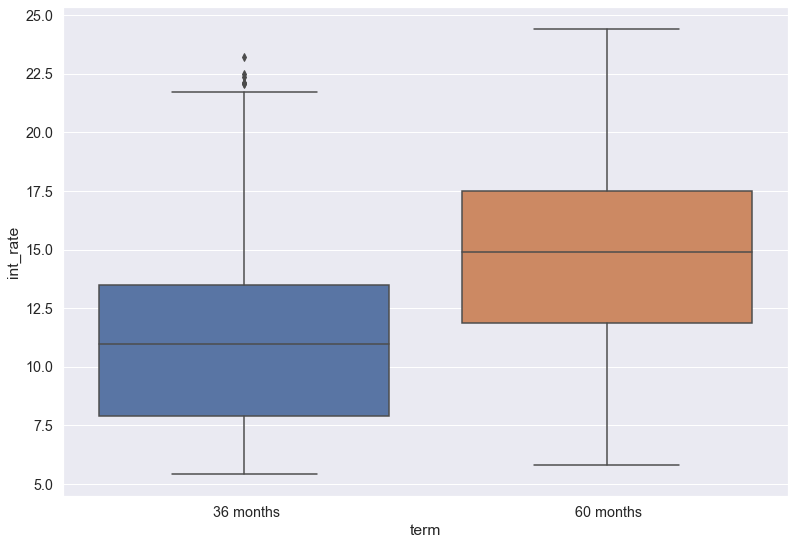

In [84]:
plt.figure(figsize=(13,9))
sns.boxplot(data=df, x='term', y='int_rate')

##### Observation
The 'term' has a clear correlation with default ratio. The longer term (60 months) has a significantly higher risk of default. However it is also true that the average loan amount in case of longer terms is also significantly higher meaning that these attributes (loan amount and term) are correlated.

##### Title

In [85]:
df.title.value_counts()

Debt Consolidation           2090
Debt Consolidation Loan      1620
Personal Loan                 641
Consolidation                 491
debt consolidation            478
                             ... 
Murray Loan                     1
Need debt consolidation!        1
freedom2                        1
DAVE WEDDING                    1
JAL Loan                        1
Name: title, Length: 19297, dtype: int64

##### Observation
The 'Title' column contains nearly 20.000 unique values, plus the content is mainly reflected in the 'purpose' value. Can be ignored.

The column has no missing values! 
 

Defaulted cases:  
 count    5627.000000
mean       21.427581
std        11.447427
min         2.000000
25%        13.000000
50%        20.000000
75%        28.000000
max        74.000000
Name: total_acc, dtype: float64 
 

Non-defaulted cases:  
 count    32950.000000
mean        22.159393
std         11.418927
min          2.000000
25%         14.000000
50%         20.000000
75%         29.000000
max         90.000000
Name: total_acc, dtype: float64 
 



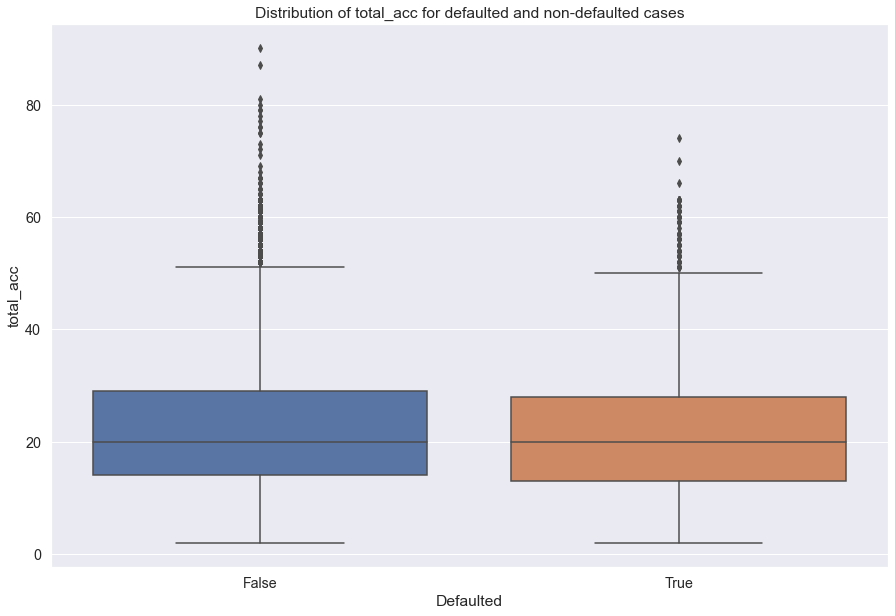

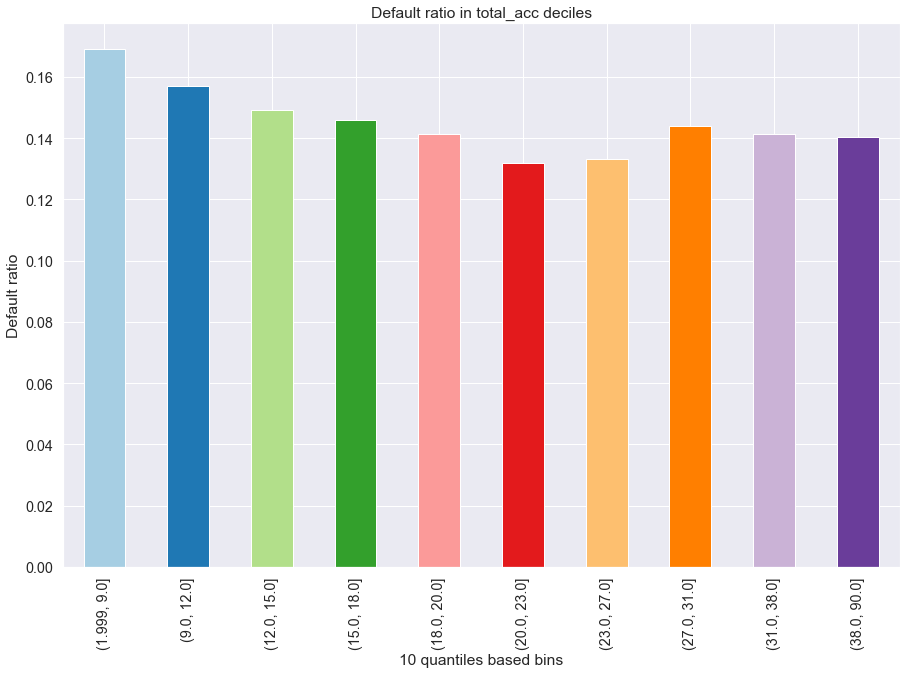

In [86]:
analyse('total_acc')

#### Observation
There is a trend showing that the more credit lines a customer has the less likely she goes default, but the difference is not significant

##### Verification status

The column has no missing values! 
 

count            38577
unique               3
top       Not Verified
freq             16694
Name: verification_status, dtype: object 
 

count    3.000000
mean     0.148176
std      0.019861
min      0.128310
25%      0.138248
50%      0.148186
75%      0.158109
max      0.168032
Name: Default_Ratio, dtype: float64


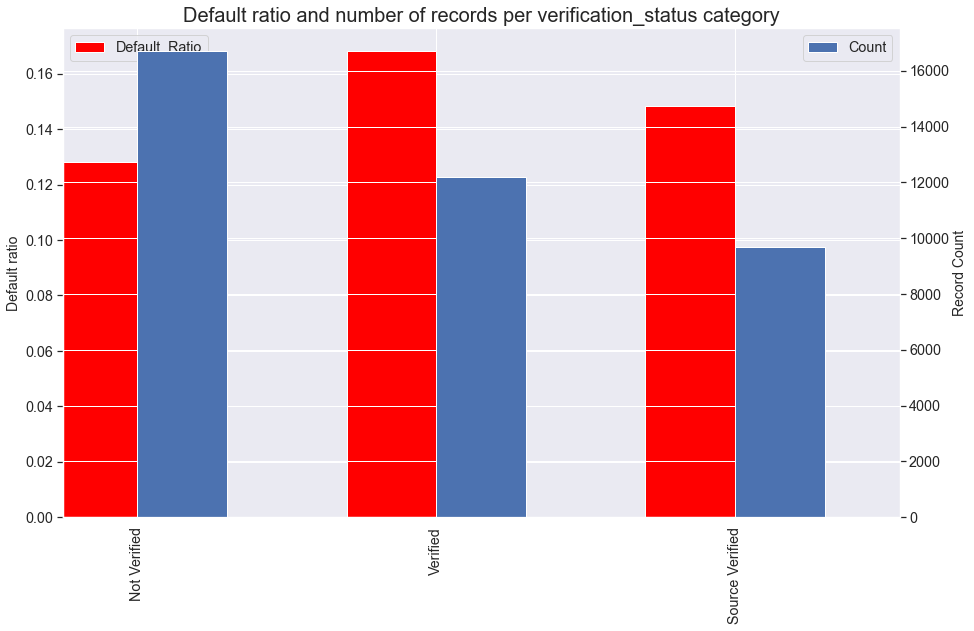

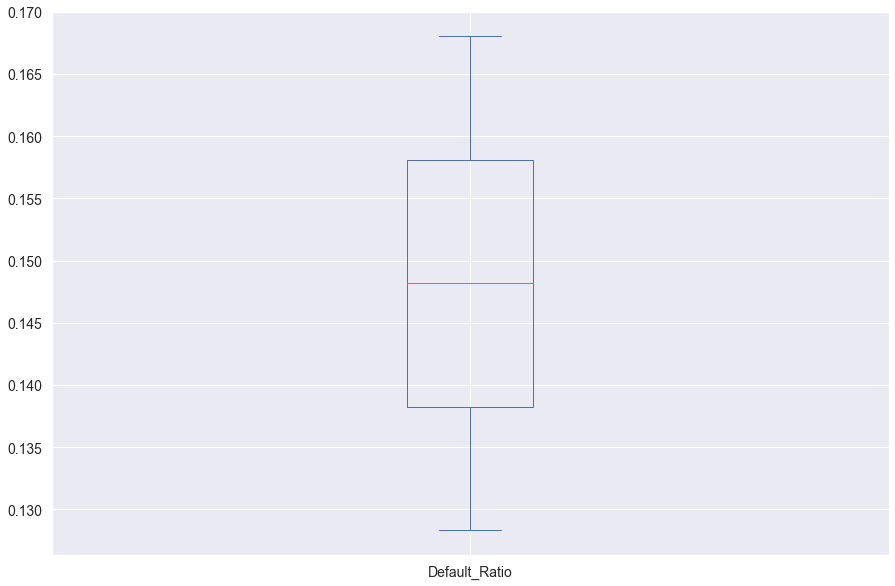

In [87]:
analyse('verification_status')

#### Observation

Counterintuitively the 'Not Verified' status has lower default rates. Further investigation is needed on this datafield to understand how and when data is collected, when a bank asks for verification and when doesn't etc.

In [88]:
Demographic_cols

['addr_state',
 'annual_inc',
 'dti',
 'earliest_cr_line',
 'emp_length',
 'home_ownership',
 'loan_amnt',
 'pub_rec',
 'pub_rec_bankruptcies',
 'purpose',
 'term',
 'title',
 'total_acc',
 'verification_status',
 'zip_code',
 'open_acc']

##### Zip code

Zip code contains too many categories to analyze. The Zip code in the U.S. however is structured the way that the first two digits refers to a larger region. Analyzing the first two digits only might have results.

In [89]:
df['zip_first_two']=df['zip_code'].apply(lambda x : x[:2])

The column has no missing values! 
 

count     38577
unique       96
top          92
freq       1759
Name: zip_first_two, dtype: object 
 

count    91.000000
mean      0.150634
std       0.061693
min       0.054795
25%       0.125890
50%       0.142303
75%       0.162817
max       0.600000
Name: Default_Ratio, dtype: float64


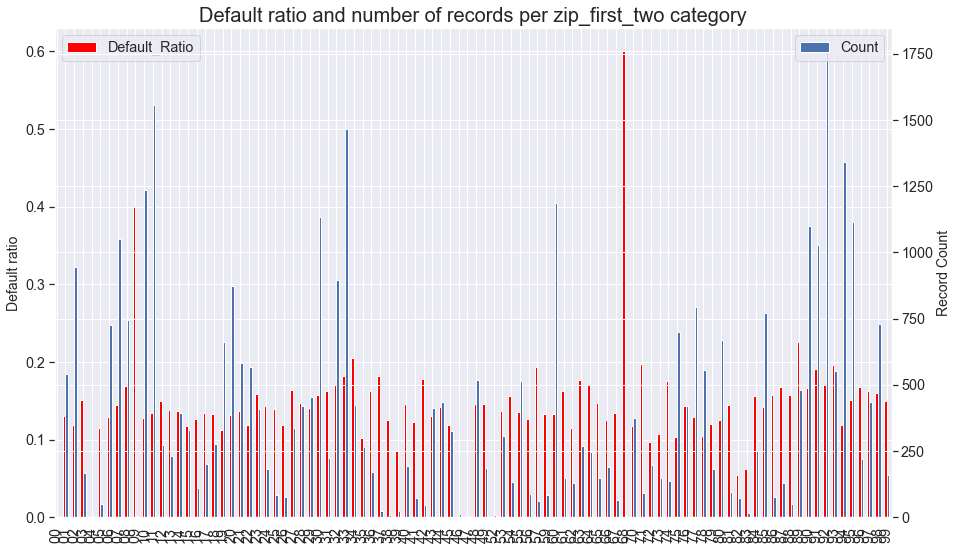

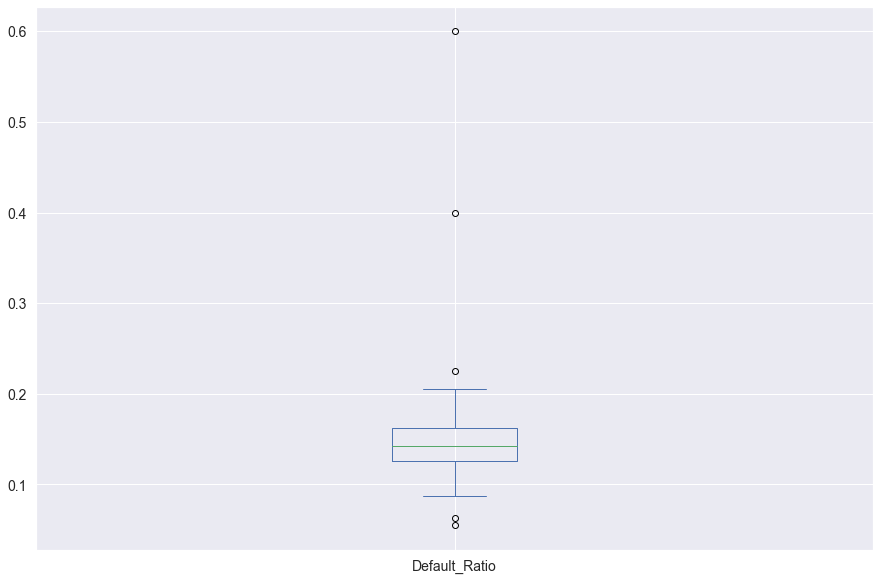

In [90]:
analyse('zip_first_two')

#### Observation
The regions that stand out contains very few datapoints. No real correlation found. 

The column has no missing values! 
 

Defaulted cases:  
 count    5627.000000
mean        9.178070
std         4.525937
min         2.000000
25%         6.000000
50%         8.000000
75%        12.000000
max        38.000000
Name: open_acc, dtype: float64 
 

Non-defaulted cases:  
 count    32950.000000
mean         9.292049
std          4.379854
min          2.000000
25%          6.000000
50%          9.000000
75%         12.000000
max         44.000000
Name: open_acc, dtype: float64 
 



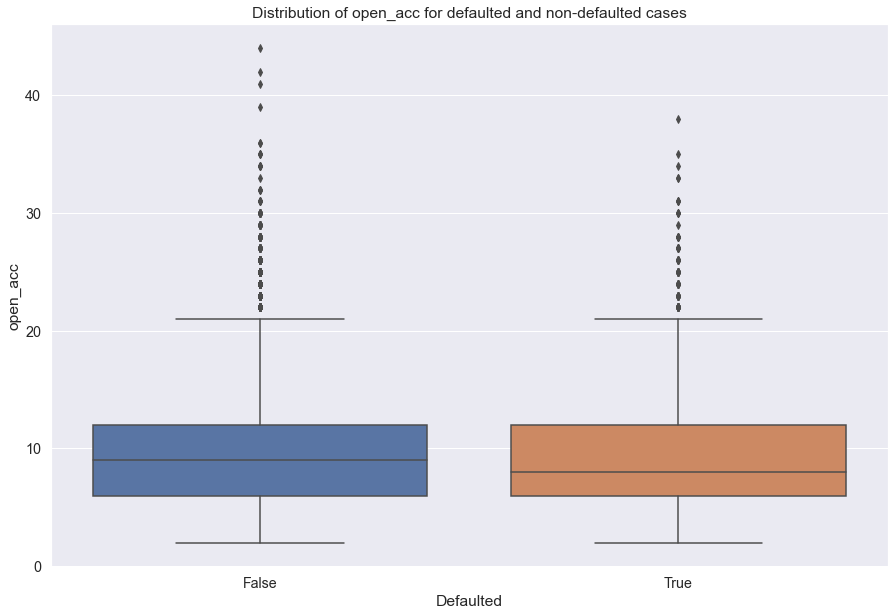

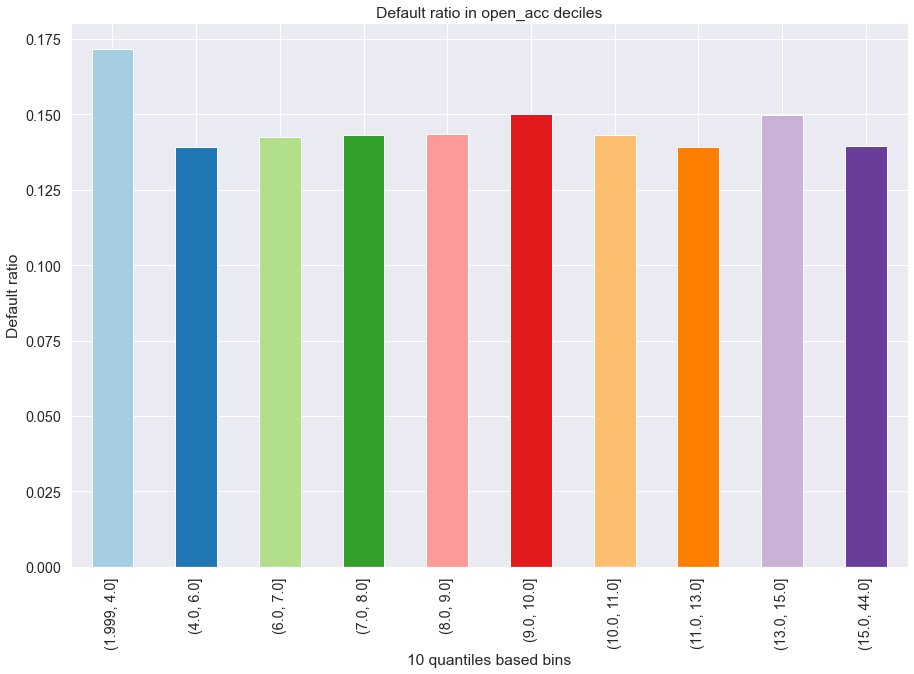

In [91]:
analyse('open_acc')

#### Observation
Customers in the first decile have higher chance for default.

## V. Conclusion
After data cleansing and business understanding the analysis - according to the original goal of the excercise - has been narrowed down to attributes that are available by the time of the credit decision. These are the only attributes in the provided file that can be used for initial credit decision.
The analysis showed the following major results:
- Customer financials:
The **'Annual income'** of the customer is in negative correlation with the default ratio meaning the higher the income bucket, the lower the default ratio is.
The **Debt To Income** ratio is in positive correlation with the default ratio meaning the higher the DTI the higher the default ratio is. 
These observations are matching the intuitions.

- Loan information:
The **Loan Amount** is in positive correlation with the default ratio
The **Purpose** of the loan can be a good indication. SME loans tend to have higher default ratio
The **Term** of the loan is a good indication as well. The longer (60 months) category has higher default ratio
These attributes however are also correlated!

- Other factors:
Loans with **Mortgage** are less likely to go default. The same applies for **Car** loans. It indicates that people who have something to lose (Car or Home) tend to be more careful with decision on loan payments. 